# Group 15

- Arvind Kumar Deenadayalan Raju
- Blessy Gabriel
- Nihkin Jacob
- John Oloyede

# Big Data Coursework - Road Safety Data (Birmingham)
This is a Data Preprocessing and Exploratory Data Analysis (EDA) report for Road Safety Data in Birmingham.

# Introduction
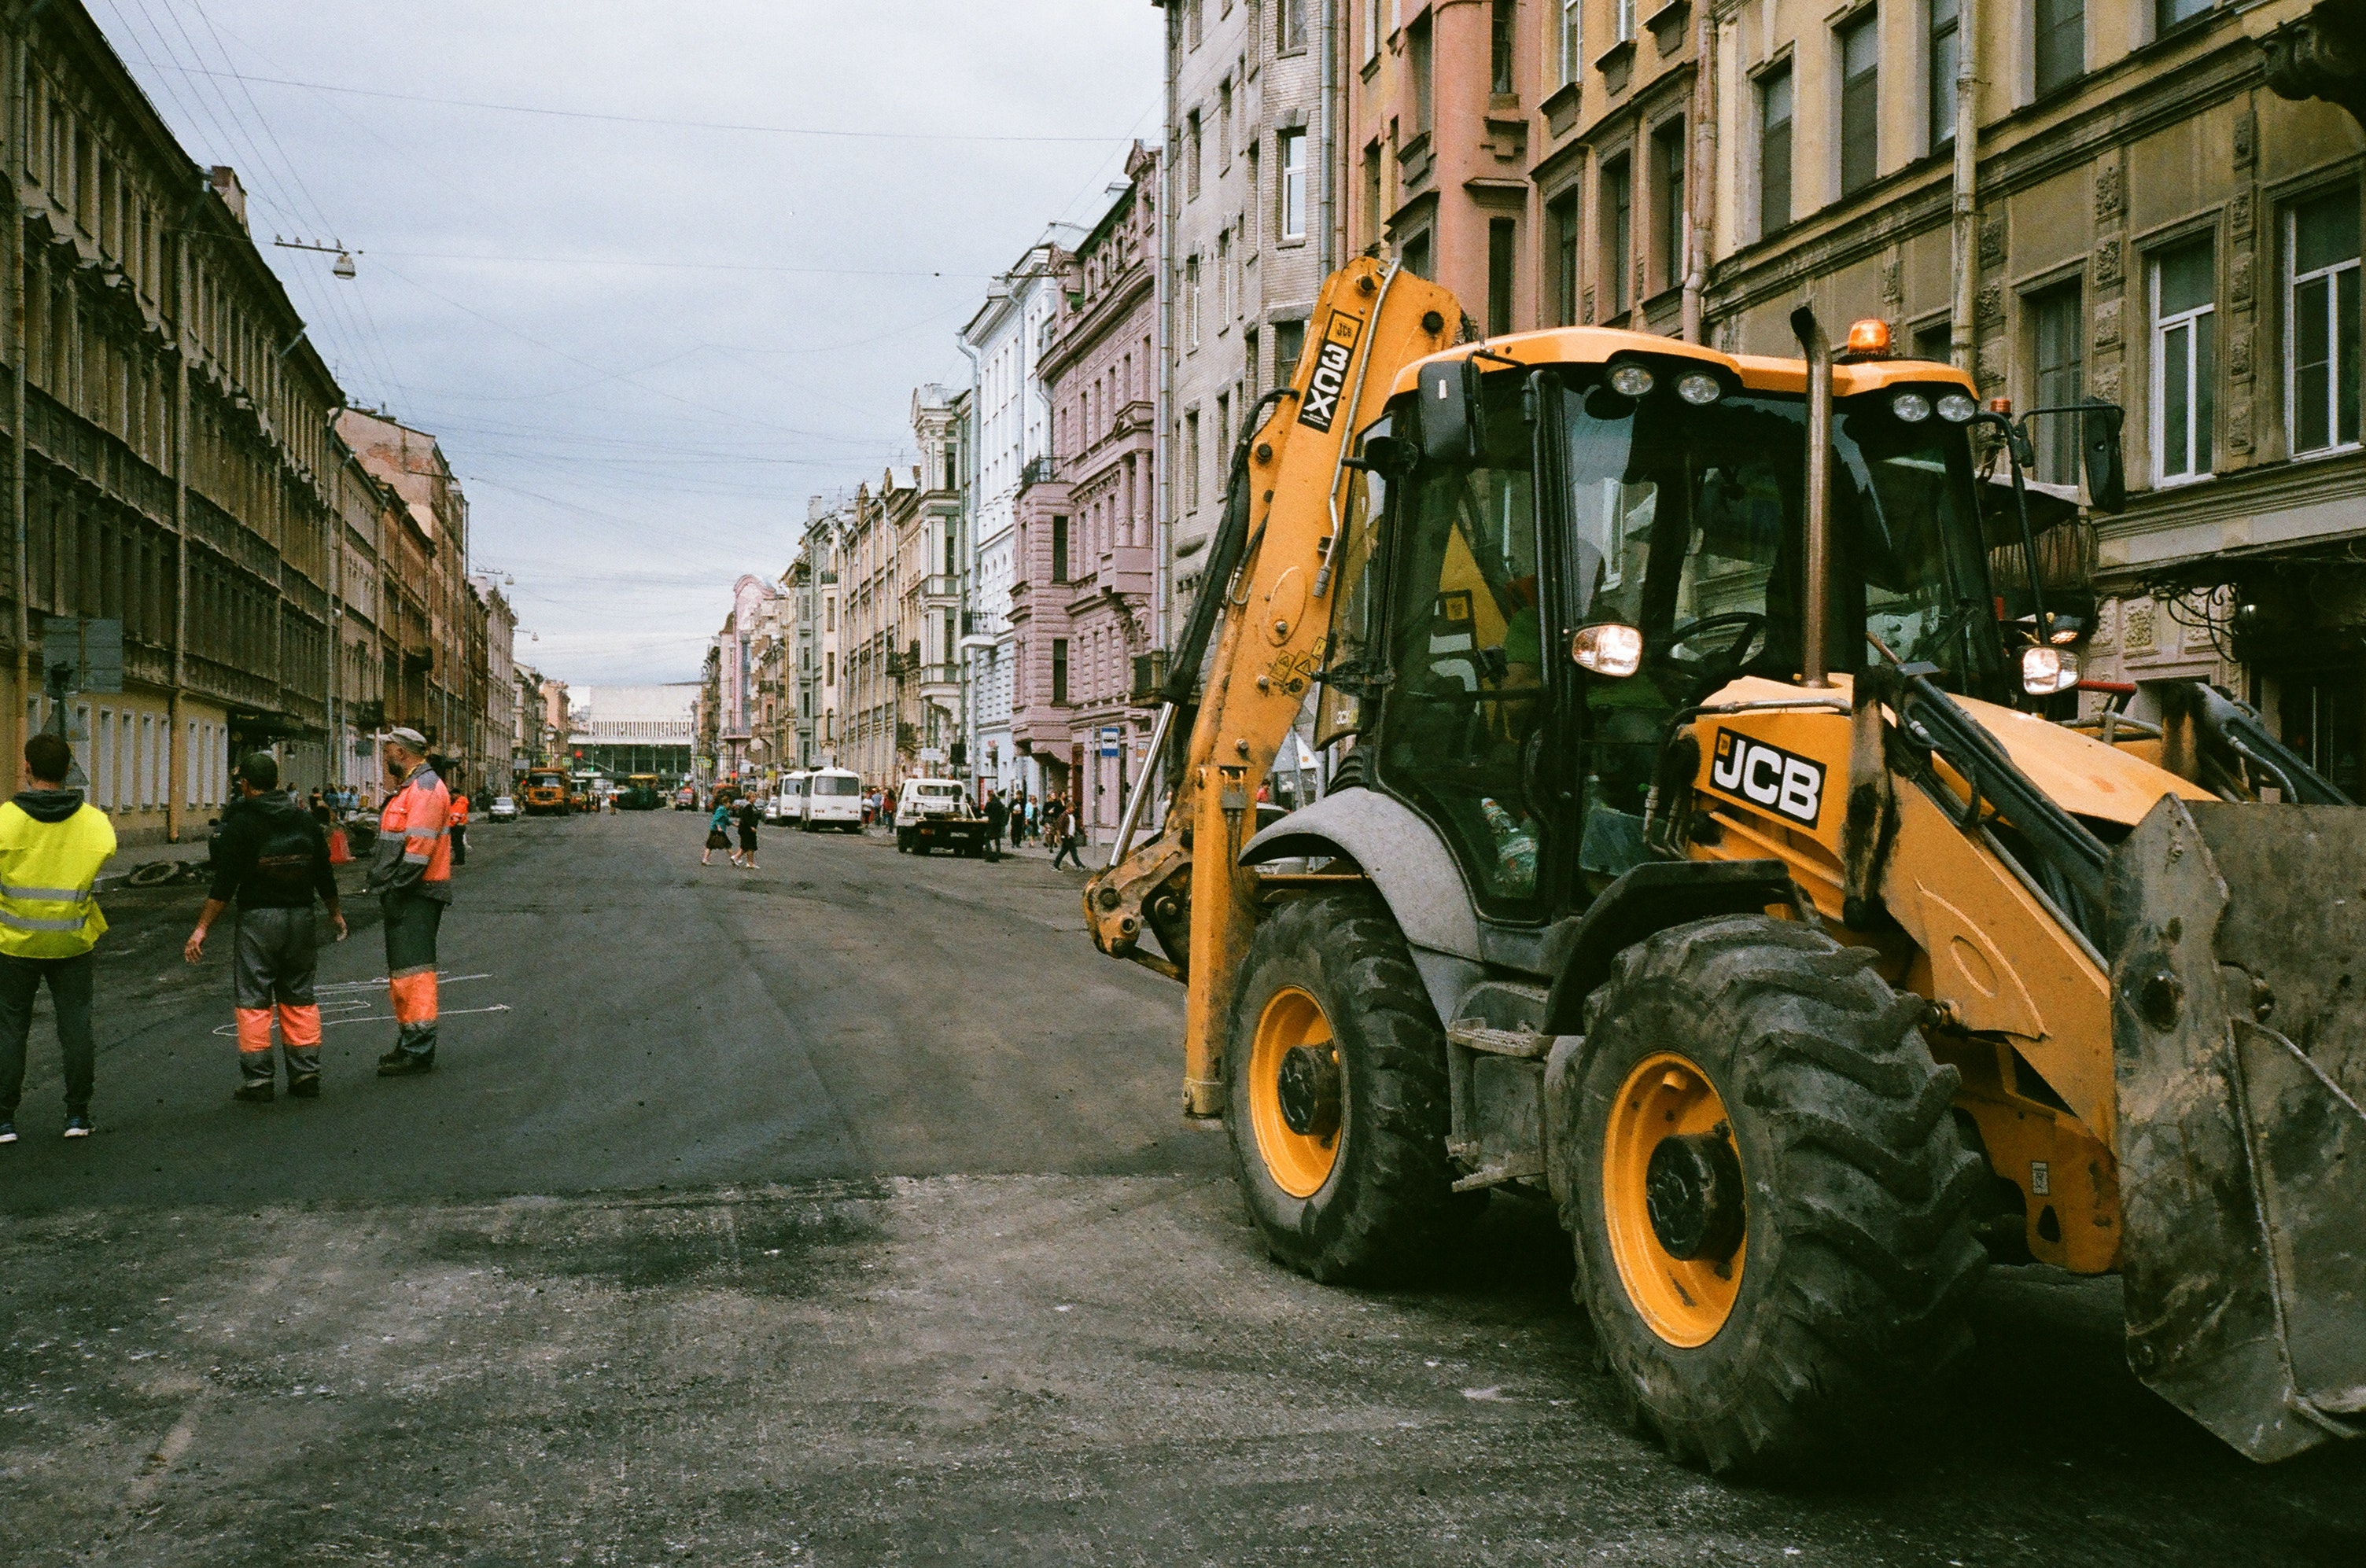
## Business Problem 
The Birmingham City Council is interested in predicting the number of road accidents that are likely to occur in their area. The purpose of this prediction is to allocate resources for road maintenance and improvement projects in a more informed and efficient way. By understanding the relationship between the number of accidents and various contributing factors, the government can gain insights into which areas and road conditions are the most dangerous or hazardous and need to be improved. This can help them to prioritize their resources and focus their efforts on areas that are likely to have the greatest impact on road safety.

Overall, the goal of this project is to use predictive analytics, focusing on the number of accidents in Birmingham as the dependent variable, to help the Birmingham City Council better understand and manage road safety in their area. By using data to inform their decision-making, they can make more informed choices about how to allocate their resources and take steps to improve the safety of their roads.

**Prediction**
- Number of Accidents per Month In a Certain LSOA Location within Birmingham

**Data Source**

The dataset required from this analysis is acquired from the link below:
https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data


## 1) Import Libraries, Packages and Required Dataset

In [357]:
import time

#Importing all the necessary packages for the BD project
# Base Libraries
import pandas as pd

pd.set_option('display.max_colwidth', None)
from pandas import DataFrame

# Libraries for Plotting
import seaborn as sb
import matplotlib.pyplot as plt
import folium

#packages for Data preprocessing, Statitical Analysis and Cleaning
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [358]:
Start_time = time.time()

In [359]:
def time_step(fn):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = fn(*args, **kwargs)
        end_time = time.time()
        time_taken = round(end_time - start_time, 4)
        if time_taken < 60:
            print(f'{fn.__name__} took {time_taken} seconds to run')
        else:
            print(f'{fn.__name__} took {time_taken / 60} minutes to run')
        return result

    return wrapper

### 1.1) Loading Dataset - Road Safety Data (Accident Data From 1979 to 2021)
The dataset contains all road accidents that have occurred in the United Kingdom between 1979 and 2021

In [360]:
#Load Initial Dataset
# This data set contains both the dependent and the independent analysis which be required to complete the analysis
df_accident = pd.read_csv('dft-road-casualty-statistics-accident-1979-2021.csv', low_memory=False)

In [361]:
#Display First 5 Rows to validate the accident dataframe
df_accident.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  197901A11AD14           1979          01A11AD14                    NaN   
1  197901A1BAW34           1979          01A1BAW34               198460.0   
2  197901A1BFD77           1979          01A1BFD77               406380.0   
3  197901A1BGC20           1979          01A1BGC20               281680.0   
4  197901A1BGF95           1979          01A1BGF95               153960.0   

   location_northing_osgr  longitude  latitude  police_force  \
0                     NaN        NaN       NaN             1   
1                894000.0        NaN       NaN             1   
2                307000.0        NaN       NaN             1   
3                440000.0        NaN       NaN             1   
4                795000.0        NaN       NaN             1   

   accident_severity  number_of_vehicles  ...  \
0                  3                   2  ...   
1                  3                   1  ...   
2                  3                   2  ...   
3                  3                   2  ...   
4                  2                   2  ...   

   pedestrian_crossing_physical_facilities light_conditions  \
0                                       -1                1   
1                                       -1                4   
2                                       -1                4   
3                                       -1                4   
4                                       -1                4   

   weather_conditions road_surface_conditions  special_conditions_at_site  \
0                   8                       1                          -1   
1                   8                       3                          -1   
2                   8                       3                          -1   
3                   8                       3                          -1   
4                   3                       3                          -1   

  carriageway_hazards urban_or_rural_area  \
0                   0                  -1   
1                   0                  -1   
2                   0                  -1   
3                   0                  -1   
4                   0                  -1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                           -1               -1   
1                                           -1               -1   
2                                           -1               -1   
3                                           -1               -1   
4                                           -1               -1   

   lsoa_of_accident_location  
0                         -1  
1                         -1  
2                         -1  
3                         -1  
4                         -1  

[5 rows x 36 columns]

In [362]:
# Validating the number of rows and columns
df_accident.shape

(8703911, 36)

There are 8.7 million accidents and 36 variables which explain the situation around that accident. This dataset will later be filtered out to what we need to focus on Birmingham.

In [363]:
#Provide a summary of the dataframe
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

Variables are categorised into multiple types : Nominal, Ordinal, Interval, Ratio.
To simplify, the types are narrowed down into 3 main types:
- Numeric : Variables containing numeric values.
- Categorical : Variables containing text data / each unique value indicates a category.
- Boolean : Categorical Variables with two categories

## 1.2)Selection of Relevant Section of Data
We would be focusing on Birmingham's accident data, and also the accidents which happened within 2016 - 2020. The Road Safety Dataset Guide helps us identify all data which regards with Birmingham are categorised under the local authority district as **300**

In [364]:
# Limiting Data to Birmingham Only
df_accident = df_accident[(df_accident.local_authority_district == 300)]
df_accident.head()

accident_index  accident_year accident_reference  \
108627  19792000B2270           1979          2000B2270   
108633  197920A01B405           1979          20A01B405   
108634  197920A01C255           1979          20A01C255   
108638  197920A01C553           1979          20A01C553   
108639  197920A01D355           1979          20A01D355   

        location_easting_osgr  location_northing_osgr  longitude  latitude  \
108627               407500.0                278400.0        NaN       NaN   
108633               123860.0                100000.0        NaN       NaN   
108634                55790.0                400000.0        NaN       NaN   
108638                73810.0                800000.0        NaN       NaN   
108639                48860.0                200000.0        NaN       NaN   

        police_force  accident_severity  number_of_vehicles  ...  \
108627            20                  1                   1  ...   
108633            20                  2                   2  ...   
108634            20                  3                   2  ...   
108638            20                  3                   2  ...   
108639            20                  3                   2  ...   

        pedestrian_crossing_physical_facilities light_conditions  \
108627                                        0                4   
108633                                       -1                4   
108634                                       -1                5   
108638                                       -1                4   
108639                                        1                4   

        weather_conditions road_surface_conditions  \
108627                   8                       1   
108633                   8                       3   
108634                   8                       2   
108638                   8                       3   
108639                   8                       3   

        special_conditions_at_site carriageway_hazards urban_or_rural_area  \
108627                           0                   0                  -1   
108633                          -1                   0                  -1   
108634                          -1                   0                  -1   
108638                          -1                   0                  -1   
108639                          -1                   0                  -1   

        did_police_officer_attend_scene_of_accident  trunk_road_flag  \
108627                                           -1               -1   
108633                                           -1               -1   
108634                                           -1               -1   
108638                                           -1               -1   
108639                                           -1               -1   

        lsoa_of_accident_location  
108627                         -1  
108633                         -1  
108634                         -1  
108638                         -1  
108639                         -1  

[5 rows x 36 columns]

In [365]:
# Limiting Data to Last 10 Years (2016-2020) caused it is identified that there are no data in 2021 for Birmingham in 2021
df_accident = df_accident[df_accident.accident_year.between(2016, 2020)]
df_accident.head()

accident_index  accident_year accident_reference  \
8059418  2016200037466           2016          200037466   
8059419  2016200038317           2016          200038317   
8059423  2016200038547           2016          200038547   
8059425  2016200038601           2016          200038601   
8059426  2016200038657           2016          200038657   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
8059418               408607.0                286362.0  -1.874721  52.475093   
8059419               406994.0                295350.0  -1.898282  52.555918   
8059423               403170.0                286714.0  -1.954766  52.478315   
8059425               403638.0                290056.0  -1.947839  52.508357   
8059426               410018.0                282114.0  -1.854074  52.436879   

         police_force  accident_severity  number_of_vehicles  ...  \
8059418            20                  2                   1  ...   
8059419            20                  3                   2  ...   
8059423            20                  3                   1  ...   
8059425            20                  3                   4  ...   
8059426            20                  3                   2  ...   

         pedestrian_crossing_physical_facilities light_conditions  \
8059418                                        0                5   
8059419                                        0                4   
8059423                                        0                1   
8059425                                        0                4   
8059426                                        0                1   

         weather_conditions road_surface_conditions  \
8059418                   1                       2   
8059419                   2                       2   
8059423                   1                       2   
8059425                   2                       2   
8059426                   5                       2   

         special_conditions_at_site carriageway_hazards urban_or_rural_area  \
8059418                           0                   0                   1   
8059419                           0                   0                   1   
8059423                           0                   0                   1   
8059425                           0                   0                   1   
8059426                           0                   0                   1   

         did_police_officer_attend_scene_of_accident  trunk_road_flag  \
8059418                                            2                2   
8059419                                            1                2   
8059423                                            2                2   
8059425                                            1                2   
8059426                                            1                2   

         lsoa_of_accident_location  
8059418                  E01009200  
8059419                  E01009220  
8059423                  E01009147  
8059425                  E01009274  
8059426                  E01009046  

[5 rows x 36 columns]

In [366]:
# Validating the number of rows and columns
df_accident.shape

(12549, 36)

The number of rows drop from 8,703,911 to 12,549

## 2) Feature Engineering, Normalization & Scaling

**We need to extract the Months from the date column because the data does not provide the accidents per month**

In [367]:
# Extracting Month From Date Column
df_accident[["month"]] = df_accident["date"].apply(lambda x: pd.Series(str(x).split("/")[1]))
df_accident.drop(["date"], axis=1, inplace=True)
df_accident.head()

accident_index  accident_year accident_reference  \
8059418  2016200037466           2016          200037466   
8059419  2016200038317           2016          200038317   
8059423  2016200038547           2016          200038547   
8059425  2016200038601           2016          200038601   
8059426  2016200038657           2016          200038657   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
8059418               408607.0                286362.0  -1.874721  52.475093   
8059419               406994.0                295350.0  -1.898282  52.555918   
8059423               403170.0                286714.0  -1.954766  52.478315   
8059425               403638.0                290056.0  -1.947839  52.508357   
8059426               410018.0                282114.0  -1.854074  52.436879   

         police_force  accident_severity  number_of_vehicles  ...  \
8059418            20                  2                   1  ...   
8059419            20                  3                   2  ...   
8059423            20                  3                   1  ...   
8059425            20                  3                   4  ...   
8059426            20                  3                   2  ...   

         light_conditions  weather_conditions road_surface_conditions  \
8059418                 5                   1                       2   
8059419                 4                   2                       2   
8059423                 1                   1                       2   
8059425                 4                   2                       2   
8059426                 1                   5                       2   

         special_conditions_at_site carriageway_hazards urban_or_rural_area  \
8059418                           0                   0                   1   
8059419                           0                   0                   1   
8059423                           0                   0                   1   
8059425                           0                   0                   1   
8059426                           0                   0                   1   

         did_police_officer_attend_scene_of_accident  trunk_road_flag  \
8059418                                            2                2   
8059419                                            1                2   
8059423                                            2                2   
8059425                                            1                2   
8059426                                            1                2   

         lsoa_of_accident_location  month  
8059418                  E01009200     01  
8059419                  E01009220     01  
8059423                  E01009147     01  
8059425                  E01009274     01  
8059426                  E01009046     01  

[5 rows x 36 columns]

In [368]:
df_accident["month"].value_counts()

11    1242
10    1132
01    1130
09    1082
07    1074
05    1049
02    1032
12    1030
08    1006
06     981
03     918
04     873
Name: month, dtype: int64

**We created dummy variables for each day of the week to help understand the number of accidents for each day of the week in that particular month. This was helpful to cumulate the number of accident which happened in a particular month**

In [369]:
# Dummy Variable Encoding
# create 7 columns using pandas get_dummies function
day_cols = pd.get_dummies(df_accident["day_of_week"], prefix="day")

# merge the one-hot encoded dataframe with the original dataframe
df_accident = pd.concat([df_accident, day_cols], axis=1)

# drop the original 'Day_of_Week' column
df_accident.drop("day_of_week", axis=1, inplace=True)
df_accident.head()

accident_index  accident_year accident_reference  \
8059418  2016200037466           2016          200037466   
8059419  2016200038317           2016          200038317   
8059423  2016200038547           2016          200038547   
8059425  2016200038601           2016          200038601   
8059426  2016200038657           2016          200038657   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
8059418               408607.0                286362.0  -1.874721  52.475093   
8059419               406994.0                295350.0  -1.898282  52.555918   
8059423               403170.0                286714.0  -1.954766  52.478315   
8059425               403638.0                290056.0  -1.947839  52.508357   
8059426               410018.0                282114.0  -1.854074  52.436879   

         police_force  accident_severity  number_of_vehicles  ...  \
8059418            20                  2                   1  ...   
8059419            20                  3                   2  ...   
8059423            20                  3                   1  ...   
8059425            20                  3                   4  ...   
8059426            20                  3                   2  ...   

         trunk_road_flag lsoa_of_accident_location  month day_1 day_2  day_3  \
8059418                2                 E01009200     01     1     0      0   
8059419                2                 E01009220     01     0     1      0   
8059423                2                 E01009147     01     0     1      0   
8059425                2                 E01009274     01     0     1      0   
8059426                2                 E01009046     01     1     0      0   

         day_4  day_5  day_6  day_7  
8059418      0      0      0      0  
8059419      0      0      0      0  
8059423      0      0      0      0  
8059425      0      0      0      0  
8059426      0      0      0      0  

[5 rows x 42 columns]

We group the amount of accidents that happen in a particular month for a particular LSOA location in their respective years
- LSOA (Lower Layer Super Output Area) locations. LSOAs are small geographic areas used in the United Kingdom for the purpose of reporting and analyzing statistics at a granular level. An LSOA is a geographical area designed to be relatively homogeneous in terms of population size and housing, with an average population of around 1,500 people.

In [370]:
# Grouping Data By Location (LSOA) & Month
group_df = df_accident.groupby(["lsoa_of_accident_location", "accident_year", "month"])
print("Total Groups - ", len(group_df))

Total Groups -  9524


In [371]:
# Display First Group
df_first = pd.DataFrame
for group, data in group_df:
    print("First Group (Location, Year, Month) - ", group)
    df_first = data
    break
df_first.head()

First Group (Location, Year, Month) -  ('E01008881', 2016, '02')


accident_index  accident_year accident_reference  \
8060218  2016200049408           2016          200049408   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
8060218               412877.0                285286.0  -1.811896  52.465336   

         police_force  accident_severity  number_of_vehicles  ...  \
8060218            20                  3                   2  ...   

         trunk_road_flag lsoa_of_accident_location  month day_1 day_2  day_3  \
8060218                2                 E01008881     02     0     0      0   

         day_4  day_5  day_6  day_7  
8060218      0      0      0      1  

[1 rows x 42 columns]

**We sum the number of vehicles and casualties involved in an accident for that particular month in that location**

In [372]:
# Calculating the Sums of Vehicles & Casualties Columns
cols = ["number_of_vehicles", "number_of_casualties",
        "day_1", "day_2", "day_3", "day_4", "day_5", "day_6", "day_7"]
count = 0
for group, data in group_df:
    # Displaying First 2 Sums
    if count < 2:
        print("Group", (count + 1), "- ", group)
        print(data[cols].sum(), "\n")
        count += 1

Group 1 -  ('E01008881', 2016, '02')
number_of_vehicles      2
number_of_casualties    1
day_1                   0
day_2                   0
day_3                   0
day_4                   0
day_5                   0
day_6                   0
day_7                   1
dtype: int64 

Group 2 -  ('E01008881', 2016, '04')
number_of_vehicles      1
number_of_casualties    1
day_1                   0
day_2                   0
day_3                   0
day_4                   0
day_5                   0
day_6                   1
day_7                   0
dtype: int64 



Due to the sumation of accidents, to find the amount of accidents that happened in a month in a particular location, we handle the categorical variables by choosing the one which occured the most for a particular variable in that particular month. 
- Example for lighting conditions if most of the accidents which occurred in that month are during the day, the lighting condition for the accident in that month for that location would be daylight 

In [373]:
# Calculating the Mode (Most Occurrence) Of Each Column
count = 0

# Displaying for First Group
df_mode = pd.DataFrame
for group, data in group_df:
    if count < 1:
        print("First Group - ", group)
        df_mode = data.mode(numeric_only=False, dropna=True).dropna()
        count += 1
df_mode.head()

First Group -  ('E01008881', 2016, '02')


accident_index  accident_year accident_reference  location_easting_osgr  \
0  2016200049408           2016          200049408               412877.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                285286.0  -1.811896  52.465336            20   

   accident_severity  number_of_vehicles  ...  trunk_road_flag  \
0                  3                   2  ...                2   

  lsoa_of_accident_location  month day_1 day_2  day_3  day_4  day_5  day_6  \
0                 E01008881     02     0     0      0      0      0      0   

   day_7  
0      1  

[1 rows x 42 columns]

### Final Dataframe Creation

We create our final dataframe which has our **dependent variable: no_of_accidents** this column in the final dataframe would contain our the number of accidents which occured in that particular month for that particular location.

In [374]:
# Creating the final Dataset with required columns
df_final = pd.DataFrame(columns=["no_of_accidents"] + df_mode.columns.tolist())
df_final.head()

Empty DataFrame
Columns: [no_of_accidents, accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location, month, day_1, day_2, day_3, day_4, day_5, day_6, day_7]
Index: []

[0 rows x 43 columns]

We combine the modedF and SumDF to create the final dataframe.

In [375]:
# Combining ModeDF & SumDF to Create Final Dataset
count = 0
for group, data in group_df:
    # Calculate Modes in Group
    df_mode = data.mode(numeric_only=False, dropna=True).dropna()

    # Calculate Sums (Vehicles & Casualties) in Group
    df_sum = DataFrame(data[cols].sum()).transpose()

    # Replace Vehicles Column (SumDF -> ModeDF)
    df_mode.number_of_vehicles = df_sum.number_of_vehicles

    # Replace Casualties Column (SumDF -> ModeDF)
    df_mode.number_of_casualties = df_sum.number_of_casualties

    # Replace Day1 - Day7 Columns (SumDF -> ModeDF)
    for day in day_cols:
        df_mode[day] = df_sum[day]

    # Append Updated ModeDF to FinalDF
    df_final = pd.concat([df_final, df_mode.iloc[:1]])
    df_final = df_final.reset_index(drop=True)

# Get Total Number of Accidents Per Month
df_final.no_of_accidents = df_final.day_1 + df_final.day_2 + df_final.day_3 + df_final.day_4 + df_final.day_5 + df_final.day_6 + df_final.day_7
df_final.shape

(9524, 43)

**The final dataframe has 9524 rows and 43 columns**

In [376]:
df_final.head(10)

no_of_accidents accident_index accident_year accident_reference  \
0               1  2016200049408          2016          200049408   
1               1  2016200065471          2016          200065471   
2               1  2016200077989          2016          200077989   
3               1  2016200093822          2016          200093822   
4               1  2016200151887          2016          200151887   
5               1  2016200112326          2016          200112326   
6               2  2016200118203        2016.0          200118203   
7               2  2016200127125        2016.0          200127125   
8               2  2017200175547        2017.0          200175547   
9               1  2017200205544          2017          200205544   

   location_easting_osgr  location_northing_osgr  longitude   latitude  \
0               412877.0                285286.0  -1.811896  52.465336   
1               412994.0                285479.0  -1.810167  52.467069   
2               412907.0                285473.0  -1.811448  52.467017   
3               412884.0                285256.0  -1.811795  52.465066   
4               412975.0                285392.0  -1.810450  52.466287   
5               412998.0                285660.0  -1.810101  52.468696   
6               412627.0                285539.0  -1.815567  52.467617   
7               412408.0                285529.0  -1.818790  52.467518   
8               412977.0                285437.0  -1.810405  52.466736   
9               412857.0                285203.0  -1.812181  52.464635   

  police_force accident_severity  ... trunk_road_flag  \
0           20                 3  ...               2   
1           20                 3  ...               2   
2           20                 3  ...               2   
3           20                 3  ...               2   
4           20                 2  ...               2   
5           20                 3  ...               2   
6         20.0               3.0  ...             2.0   
7         20.0               3.0  ...             2.0   
8         20.0               3.0  ...             2.0   
9           20                 3  ...               2   

  lsoa_of_accident_location month day_1 day_2 day_3 day_4 day_5 day_6  day_7  
0                 E01008881    02     0     0     0     0     0     0      1  
1                 E01008881    04     0     0     0     0     0     1      0  
2                 E01008881    06     0     0     0     0     0     0      1  
3                 E01008881    07     0     0     0     1     0     0      0  
4                 E01008881    08     0     1     0     0     0     0      0  
5                 E01008881    09     1     0     0     0     0     0      0  
6                 E01008881    10     0     0     0     1     1     0      0  
7                 E01008881    11     0     0     1     0     0     0      1  
8                 E01008881    04     0     0     0     0     1     0      1  
9                 E01008881    07     1     0     0     0     0     0      0  

[10 rows x 43 columns]

We label encode the month and Isoa_of_accident_location. Label encoding is a technique in Python for converting categorical data into numerical data, where each unique category is assigned a numerical label. The labels are integers that start from 0 and increase by 1 for each new category

In [377]:
#Changing the 'Days of week' header names to the respective day of the week name
df_final.rename(columns={"day_1": "Sunday"}, inplace=True)
df_final.rename(columns={"day_2": "Monday"}, inplace=True)
df_final.rename(columns={"day_3": "Tuesday"}, inplace=True)
df_final.rename(columns={"day_4": "Wednesday"}, inplace=True)
df_final.rename(columns={"day_5": "Thursday"}, inplace=True)
df_final.rename(columns={"day_6": "Friday"}, inplace=True)
df_final.rename(columns={"day_7": "Saturday"}, inplace=True)

In [378]:
# Final Dataset Sample
df_final.tail()

no_of_accidents accident_index accident_year accident_reference  \
9519               2  2019200911407        2019.0          200911407   
9520               1  2019200916326          2019          200916326   
9521               1  2020200936800          2020          200936800   
9522               1  2020200946292          2020          200946292   
9523               1  2020200973315          2020          200973315   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
9519               409411.0                284963.0  -1.862907  52.462547   
9520               409508.0                285061.0  -1.861479  52.463426   
9521               409401.0                285042.0  -1.863054  52.463257   
9522               409621.0                285037.0  -1.859816  52.463209   
9523               409574.0                284754.0  -1.860516  52.460665   

     police_force accident_severity  ... trunk_road_flag  \
9519         20.0               3.0  ...             2.0   
9520           20                 3  ...               2   
9521           20                 3  ...               2   
9522           20                 3  ...               2   
9523           20                 3  ...               2   

     lsoa_of_accident_location month Sunday Monday Tuesday Wednesday Thursday  \
9519                 E01033650    11      0      0       0         0        2   
9520                 E01033650    12      0      0       0         0        0   
9521                 E01033650    01      0      0       0         1        0   
9522                 E01033650    02      0      0       0         0        0   
9523                 E01033650    07      0      0       0         0        0   

     Friday  Saturday  
9519      0         0  
9520      0         1  
9521      0         0  
9522      1         0  
9523      0         1  

[5 rows x 43 columns]

In [379]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   no_of_accidents                              9524 non-null   object 
 1   accident_index                               9524 non-null   object 
 2   accident_year                                9524 non-null   object 
 3   accident_reference                           9524 non-null   object 
 4   location_easting_osgr                        9524 non-null   float64
 5   location_northing_osgr                       9524 non-null   float64
 6   longitude                                    9524 non-null   float64
 7   latitude                                     9524 non-null   float64
 8   police_force                                 9524 non-null   object 
 9   accident_severity                            9524 non-null   object 
 10  

In [380]:
# Final Dataset Sample
df_final.tail()

no_of_accidents accident_index accident_year accident_reference  \
9519               2  2019200911407        2019.0          200911407   
9520               1  2019200916326          2019          200916326   
9521               1  2020200936800          2020          200936800   
9522               1  2020200946292          2020          200946292   
9523               1  2020200973315          2020          200973315   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
9519               409411.0                284963.0  -1.862907  52.462547   
9520               409508.0                285061.0  -1.861479  52.463426   
9521               409401.0                285042.0  -1.863054  52.463257   
9522               409621.0                285037.0  -1.859816  52.463209   
9523               409574.0                284754.0  -1.860516  52.460665   

     police_force accident_severity  ... trunk_road_flag  \
9519         20.0               3.0  ...             2.0   
9520           20                 3  ...               2   
9521           20                 3  ...               2   
9522           20                 3  ...               2   
9523           20                 3  ...               2   

     lsoa_of_accident_location month Sunday Monday Tuesday Wednesday Thursday  \
9519                 E01033650    11      0      0       0         0        2   
9520                 E01033650    12      0      0       0         0        0   
9521                 E01033650    01      0      0       0         1        0   
9522                 E01033650    02      0      0       0         0        0   
9523                 E01033650    07      0      0       0         0        0   

     Friday  Saturday  
9519      0         0  
9520      0         1  
9521      0         0  
9522      1         0  
9523      0         1  

[5 rows x 43 columns]

In [381]:
for x in ['no_of_accidents', 'number_of_vehicles', 'number_of_casualties', 'speed_limit']:
    df_final[x] = df_final[x].astype(int)

In [382]:
for x in ['lsoa_of_accident_location', 'month']:
    df_final[x] = df_final[x].astype(object)

In [383]:
df_final.head(10)

no_of_accidents accident_index accident_year accident_reference  \
0                1  2016200049408          2016          200049408   
1                1  2016200065471          2016          200065471   
2                1  2016200077989          2016          200077989   
3                1  2016200093822          2016          200093822   
4                1  2016200151887          2016          200151887   
5                1  2016200112326          2016          200112326   
6                2  2016200118203        2016.0          200118203   
7                2  2016200127125        2016.0          200127125   
8                2  2017200175547        2017.0          200175547   
9                1  2017200205544          2017          200205544   

   location_easting_osgr  location_northing_osgr  longitude   latitude  \
0               412877.0                285286.0  -1.811896  52.465336   
1               412994.0                285479.0  -1.810167  52.467069   
2               412907.0                285473.0  -1.811448  52.467017   
3               412884.0                285256.0  -1.811795  52.465066   
4               412975.0                285392.0  -1.810450  52.466287   
5               412998.0                285660.0  -1.810101  52.468696   
6               412627.0                285539.0  -1.815567  52.467617   
7               412408.0                285529.0  -1.818790  52.467518   
8               412977.0                285437.0  -1.810405  52.466736   
9               412857.0                285203.0  -1.812181  52.464635   

  police_force accident_severity  ...  trunk_road_flag  \
0           20                 3  ...                2   
1           20                 3  ...                2   
2           20                 3  ...                2   
3           20                 3  ...                2   
4           20                 2  ...                2   
5           20                 3  ...                2   
6         20.0               3.0  ...              2.0   
7         20.0               3.0  ...              2.0   
8         20.0               3.0  ...              2.0   
9           20                 3  ...                2   

   lsoa_of_accident_location month Sunday Monday Tuesday Wednesday Thursday  \
0                  E01008881    02      0      0       0         0        0   
1                  E01008881    04      0      0       0         0        0   
2                  E01008881    06      0      0       0         0        0   
3                  E01008881    07      0      0       0         1        0   
4                  E01008881    08      0      1       0         0        0   
5                  E01008881    09      1      0       0         0        0   
6                  E01008881    10      0      0       0         1        1   
7                  E01008881    11      0      0       1         0        0   
8                  E01008881    04      0      0       0         0        1   
9                  E01008881    07      1      0       0         0        0   

  Friday  Saturday  
0      0         1  
1      1         0  
2      0         1  
3      0         0  
4      0         0  
5      0         0  
6      0         0  
7      0         1  
8      0         1  
9      0         0  

[10 rows x 43 columns]

In [384]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   no_of_accidents                              9524 non-null   int32  
 1   accident_index                               9524 non-null   object 
 2   accident_year                                9524 non-null   object 
 3   accident_reference                           9524 non-null   object 
 4   location_easting_osgr                        9524 non-null   float64
 5   location_northing_osgr                       9524 non-null   float64
 6   longitude                                    9524 non-null   float64
 7   latitude                                     9524 non-null   float64
 8   police_force                                 9524 non-null   object 
 9   accident_severity                            9524 non-null   object 
 10  

## 3) Data Splitting
The dataset needs to be split into train and test data so it can be used for the predictive or forecasting model.

In [385]:
#split dataset in features and target variable
X = df_final.drop(["no_of_accidents"], axis=1)  # Features
y = df_final["no_of_accidents"]  # Target Variable
print(X.shape)
print(y.shape)

(9524, 42)
(9524,)


In [386]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

## 4) Descriptive Statistics & Exploratory Data Analysis on Training Dataset

In this section, we will delve deeper into the variables within the dataframe to gain a better understanding of the accidents that occurred in Birmingham city between 2016 and 2020. Our focus will be on the key variables that may have caused the accidents or influenced the number of casualties.

Since a selection of these variables will be utilized in the predictive model, descriptive statistics are crucial to improving our comprehension of them. To illustrate the skewness of each numerical variable and visualize any outliers, histograms and box plots are provided. Any outliers identified will be addressed later in the assignment.

Moreover, bar charts are provided for each categorical variable to depict their value counts. Finally, line graphs are utilized to illustrate the distribution of variables across the chosen time period.

**Please note that although most of the dataset may consist of numerical variables, they are largely categorical and categorized by numbers rather than strings.**

### 4.1) Number of Accidents

In [387]:
pd.DataFrame(y_train.tail(5))

no_of_accidents
2895                3
7813                1
905                 1
5192                2
235                 2

In [388]:
pd.DataFrame(y_train.describe())

no_of_accidents
count      6666.000000
mean          1.317282
std           0.700653
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000

We can observe that the average number of accidents that occur within a month in specific LSOA locations is 1. Moreover, it can be noted that a particular LSOA location experienced 8 accidents during a certain month.

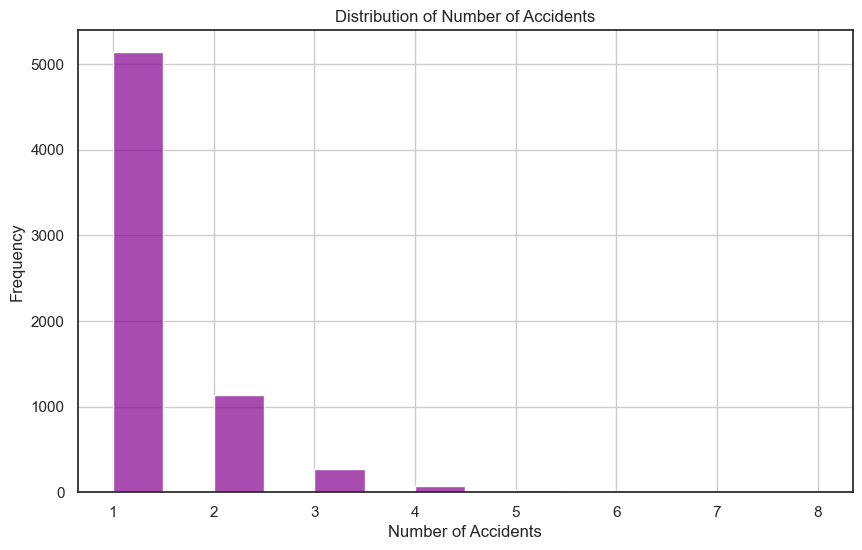

In [389]:
#Plotting histogram to visualize the distribution of the number of accidents.
data = y_train

# Set the background color to white and setting plot size
sb.set_style('white')
plt.figure(figsize=(10, 6))

# Plot the histogram
sb.histplot(data, bins='auto', alpha=0.7, color="#83008F")
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Accidents')
plt.grid(True)
plt.show()

The histogram indicates a right-skewed distribution, which suggests that the majority of the locations experience only one accident per month in certain LSOA locations.

### 4.2) Number of Casualties

In [390]:
pd.DataFrame(X_train.loc[:, 'number_of_casualties'].describe())

number_of_casualties
count           6666.000000
mean               1.768977
std                1.327544
min                1.000000
25%                1.000000
50%                1.000000
75%                2.000000
max               17.000000

We can identify that the largest number of casualties recorded is 17, and the range of casualty rate in Birmingham is from 1 to 10

To illustrate the skewness of number of casualties, we plot the distribution with a histogram.

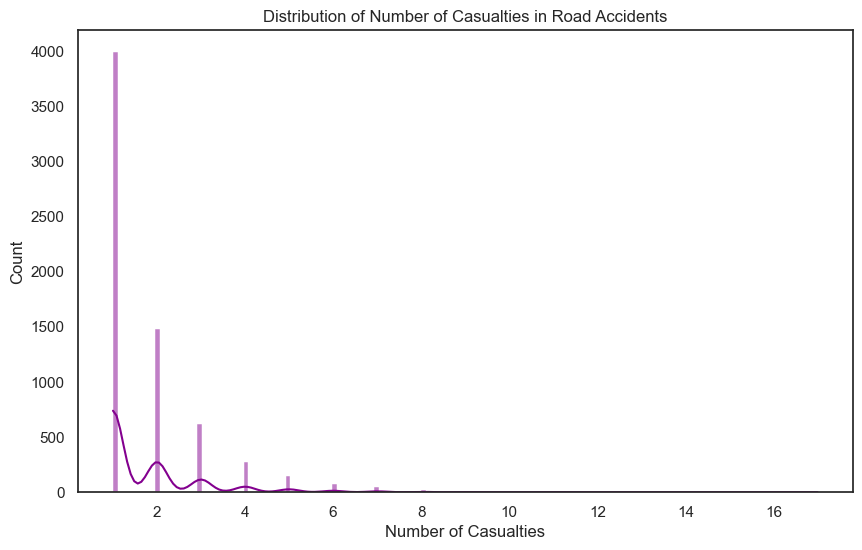

In [391]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the background color to white
sb.set_style('white')
# creating a box plot of number_of_casualties
sb.histplot(x='number_of_casualties', data=X_train, kde=True, color="#83008F")

# setting plot title and labels
plt.title('Distribution of Number of Casualties in Road Accidents')
plt.xlabel('Number of Casualties')
plt.show()

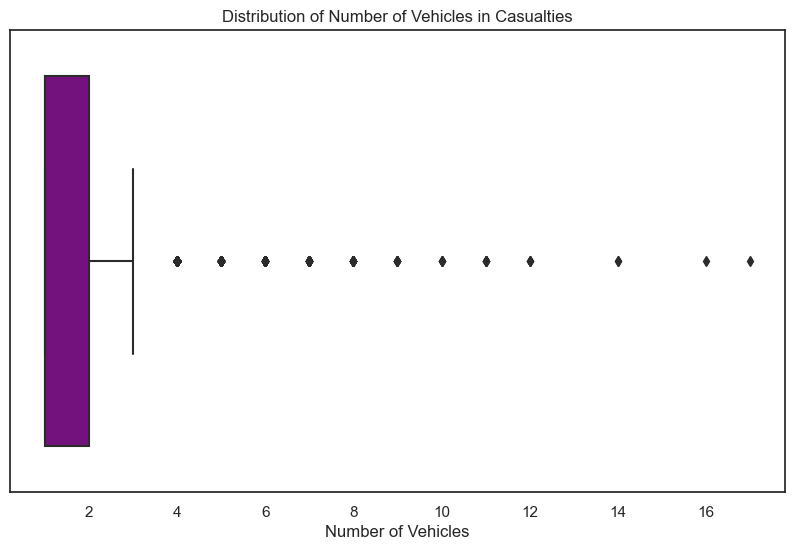

In [392]:
# Set the background color to white
sb.set_style('white')
# create a box plot of number_of_vehicles
sb.boxplot(x='number_of_casualties', data=X_train, color='#83008f')

# set plot title and labels
plt.title('Distribution of Number of Vehicles in Casualties')
plt.xlabel('Number of Vehicles')
plt.show()

From the distribution, it can be inferred that the majority of accidents resulted in a single casualty, with the second-highest number of casualties being two. As the number of casualties increases, the frequency of accidents for those specific numbers decreases.

In [393]:
# Putting DataFrame called X_train into a new variable
data = X_train

# Calculate the average latitude and longitude to center the map
avg_latitude = data['latitude'].mean()
avg_longitude = data['longitude'].mean()

# Create a folium Map instance centered on the average latitude and longitude
m = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=10)

# Add accident locations to the map
for index, row in data.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    number_of_casualties = row['number_of_casualties']

    # You can customize the color and size based on the number of casualties
    color = 'blue'
    radius = number_of_casualties

    folium.CircleMarker(
        location=[latitude, longitude],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
    ).add_to(m)

# Display the map
m

Additionally, we can observe that the majority of casualties are located around the city center, which is a bustling area.

### 4.3) Number of Vehicles Involved in accidents

In [394]:
pd.DataFrame(X_train.loc[:, 'number_of_vehicles'].describe())

number_of_vehicles
count         6666.000000
mean             2.488899
std              1.591127
min              1.000000
25%              2.000000
50%              2.000000
75%              3.000000
max             22.000000

The data suggests that the average number of cars involved in an accident is 2. However, there was a specific month where 22 cars were involved in an accident, which is an outlier.

The distribution and skewness of this variable can be visualized through the histogram and box plot below.

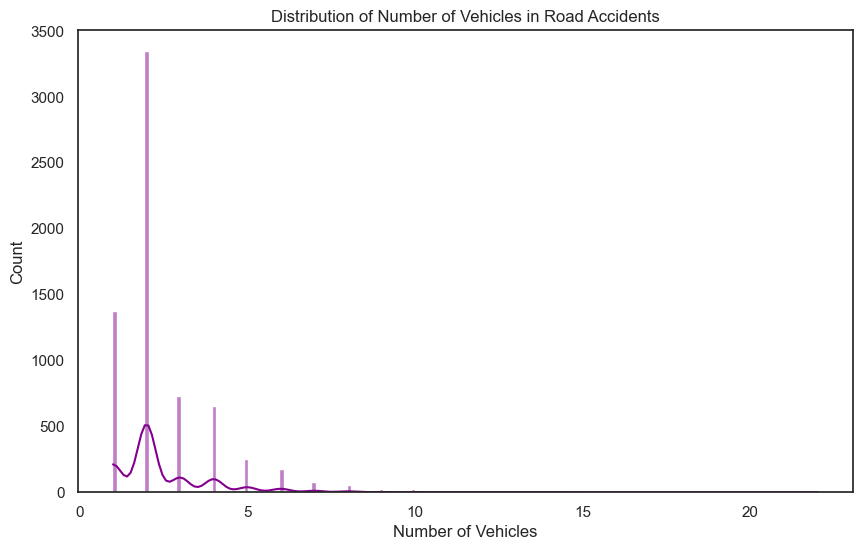

In [395]:
# Set the background color to white
sb.set_style('white')
# creating a box plot of number_of_vehicles
sb.histplot(x='number_of_vehicles', data=X_train, kde=True, color='#83008F')

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})

# Setting plot title and labels
plt.title('Distribution of Number of Vehicles in Road Accidents')
plt.xlabel('Number of Vehicles')
plt.show()

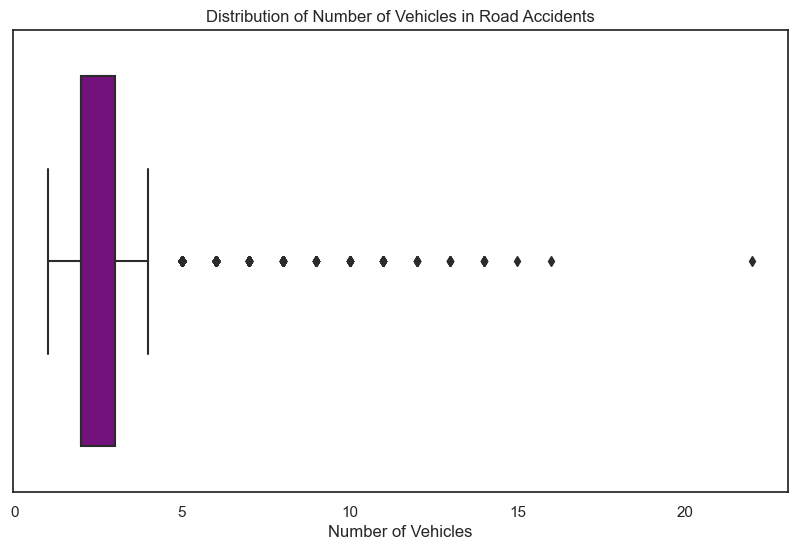

In [396]:
# Set the background color to white
sb.set_style('white')
# create a box plot of number_of_vehicles
sb.boxplot(x='number_of_vehicles', data=X_train, color='#83008f')

# set plot title and labels
plt.title('Distribution of Number of Vehicles in Road Accidents')
plt.xlabel('Number of Vehicles')
plt.show()

The data shows that the most common type of accident involves two cars, but there is also a significant number of accidents that involve only one car. It is worth noting that the majority of outliers in the data are at the higher end, ranging from 5 to 22 cars. This information is crucial in understanding the causes of accidents that involve a substantial number of vehicles.

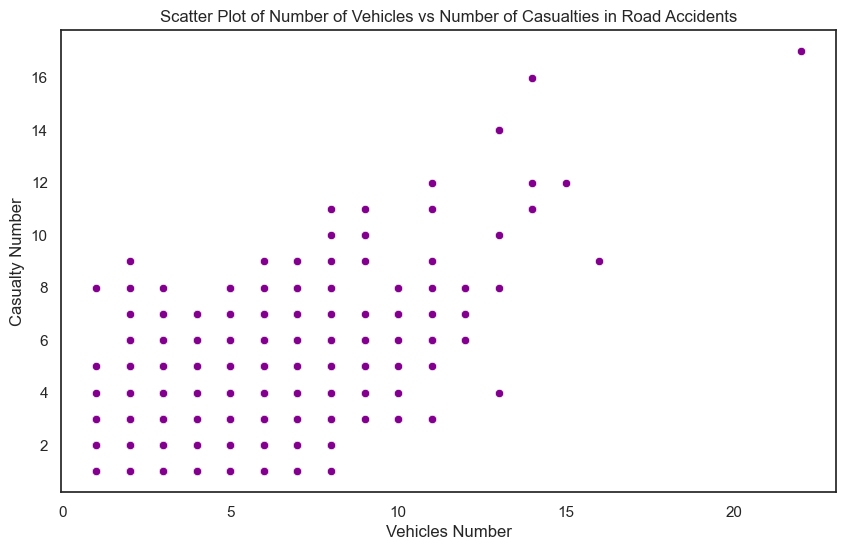

In [397]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Create a scatter plot of number_of_vehicles vs number_of_casualties
sb.scatterplot(x="number_of_vehicles", y="number_of_casualties", data=X_train)

# Set the background color to white
sb.set_style('white')
# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})

# Set the plot title and axis labels
plt.title('Scatter Plot of Number of Vehicles vs Number of Casualties in Road Accidents')
plt.xlabel('Vehicles Number')
plt.ylabel('Casualty Number')

# Show the plot
plt.show()

This scatter plot indicates a linear relationship, as the number of vehicles involved in an accident increases, the number of casualties also tends to increase.

### 4.4) Accidents By Year
We will be investigating the amount of accidents which have occurred across the years in Birmingham from 2016 till 2020

In [398]:
# Count the number of occurrences of each unique value in the `accident_year` column
accident_accident_year = X_train['accident_year'].value_counts()

# Print the counts for each unique value
print(accident_accident_year)

2016.0    1488
2018.0    1422
2017.0    1405
2019.0    1321
2020.0    1030
Name: accident_year, dtype: int64


After analyzing, it is evident that Birmingham had the highest number of accidents in 2016 over the 5-year period, followed by 2017. The accidents show a downward trend over the past 5 years apart, conversely, the lowest number of accidents occurred in 2020. This could potentially be attributed to the lockdowns caused by Covid-19. However, further investigation is recommended as the accident rate in 2020 remains relatively high, despite the majority of the population being in lockdown for over 6 months.

**Comparison of Accidents by year against Casualties and Vehicles**

In [399]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=X_train['accident_year'], columns=X_train['number_of_vehicles'])

# Print the table
print(cross_tab)

number_of_vehicles   1    2    3    4   5   6   7   8   9   10  11  12  13  \
accident_year                                                                
2016.0              303  755  155  147  58  29  17   8   5   4   0   2   2   
2017.0              291  664  163  146  62  38  17  12   2   3   3   1   1   
2018.0              288  718  152  134  41  47  18  12   4   1   1   4   1   
2019.0              267  642  139  134  56  40  16  13   3   4   4   0   1   
2020.0              217  560  111   84  30  15   5   1   1   2   4   0   0   

number_of_vehicles  14  15  16  22  
accident_year                       
2016.0               3   0   0   0  
2017.0               0   1   0   1  
2018.0               1   0   0   0  
2019.0               1   0   1   0  
2020.0               0   0   0   0  


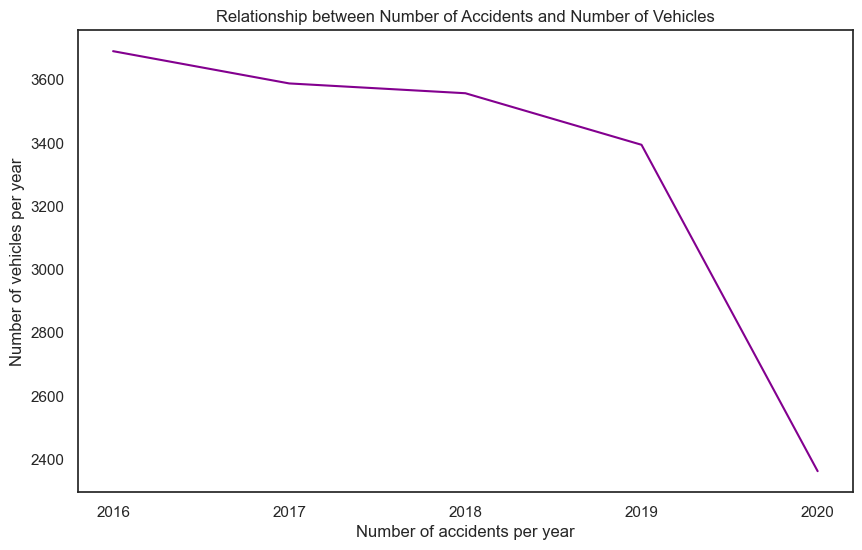

In [400]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Group the data by year and compute the total number of accidents and vehicles for each year
grouped_data = X_train.groupby('accident_year').agg({'number_of_vehicles': 'sum'})

# Set the background color to white
sb.set_style('white')

# Create a scatter plot of number of accidents vs. number of vehicles
# sb.lineplot(grouped_data.index, grouped_data['number_of_vehicles'])
sb.lineplot(grouped_data['number_of_vehicles'])

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})

# Set the x-axis tick values to be the same as the index values
plt.xticks(grouped_data.index)

# Add axis labels and a title
plt.xlabel('Number of accidents per year')
plt.ylabel('Number of vehicles per year')
plt.title('Relationship between Number of Accidents and Number of Vehicles')

# Show the plot
plt.show()

Upon examining the data, it appears that the number of vehicles involved in accidents experienced a decrease from 2016 t0 2020, 2016 had the highest number of accidents during the time period under consideration. Subsequently, there was a sharp decline by 2020 which is a result of low number of vehicles that year.

In [401]:
# Group the data by 'accident_year' and calculate the sum of casualties
casualties_by_year = data.groupby('accident_year')['number_of_casualties'].sum().reset_index()

# Display the table
casualties_by_year

accident_year  number_of_casualties
0         2016.0                  2629
1         2017.0                  2538
2         2018.0                  2534
3         2019.0                  2401
4         2020.0                  1690

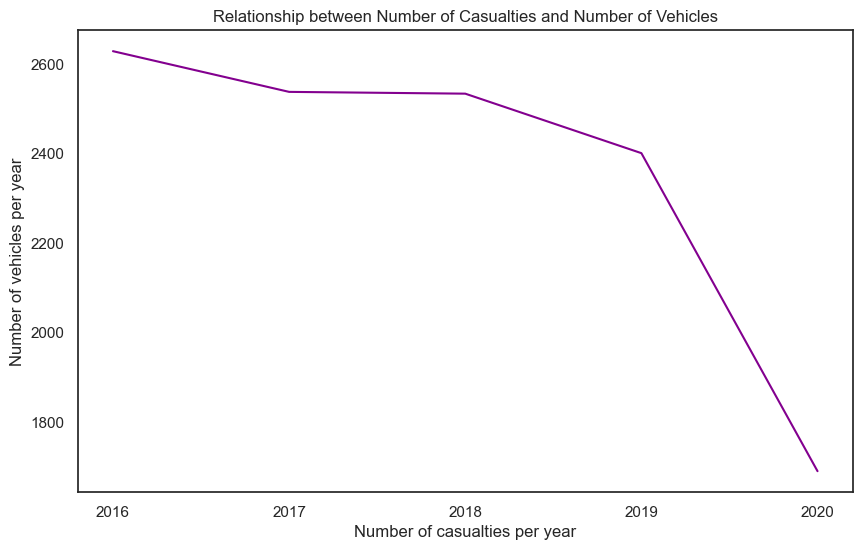

In [402]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Group the data by year and compute the total number of accidents and casualties for each year
grouped_data = X_train.groupby('accident_year').agg({'number_of_casualties': 'sum'})

# Set the background color to white
sb.set_style('white')

# Create a scatter plot of number of accidents vs. number of vehicles
# sb.lineplot(grouped_data.index, grouped_data['number_of_casualties'])
sb.lineplot(grouped_data['number_of_casualties'])

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})

# Set the x-axis tick values to be the same as the index values
plt.xticks(grouped_data.index)

# Add axis labels and a title
plt.xlabel('Number of casualties per year')
plt.ylabel('Number of vehicles per year')
plt.title('Relationship between Number of Casualties and Number of Vehicles')

# Show the plot
plt.show()

We notice the same trend here as number of vehicles involved in accidents.

### 4.5) Accident By Month Investigation

We will be investigating the amount of accidents which have occurred across the months

In [403]:
# Count the number of occurrences of each unique value in the `accident_year` column
accident_accident_month = X_train['month'].value_counts()

# Print the counts for each unique value
print(accident_accident_month)

11    625
07    592
01    591
09    585
12    572
10    571
02    565
05    552
08    537
06    515
04    483
03    478
Name: month, dtype: int64


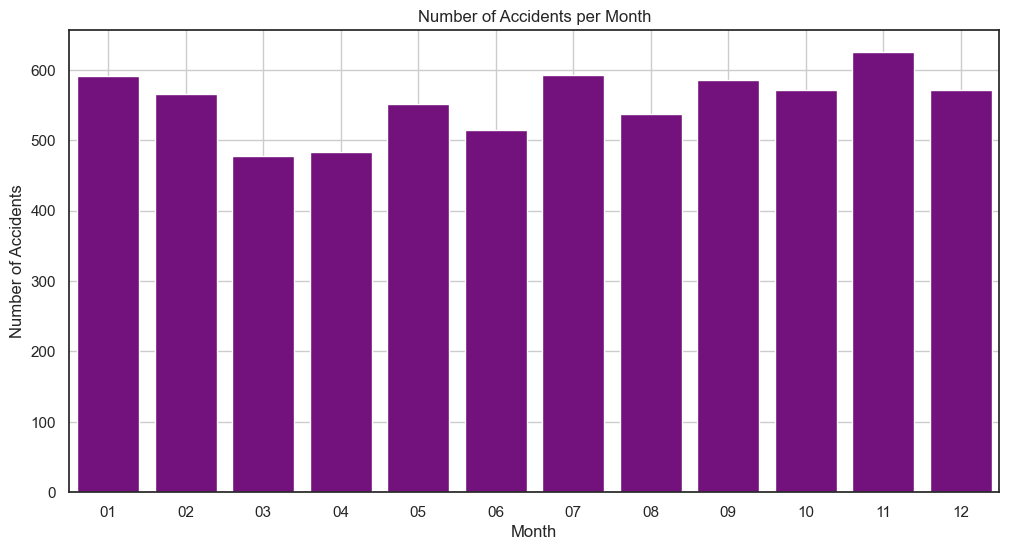

In [404]:
# Grouping the data by 'month' and count the number of accidents
accidents_by_month = data.groupby('month')['accident_index'].count().reset_index()

# Set the background color to white
sb.set_style('white')
# Ploting the number of accidents per month using a bar plot
plt.figure(figsize=(12, 6))

sb.barplot(x='month', y='accident_index', data=accidents_by_month, color="#83008F")
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month')
plt.grid(True)
plt.show()

According to the data, the month with the highest number of accidents is November, with a total of 625 accidents. The second-highest number of accidents occurred in June, with a total of 592 accidents.

In [405]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=X_train['accident_year'], columns=X_train['month'])

# Print the table
print(cross_tab)

month           01   02   03   04   05   06   07   08   09   10   11   12
accident_year                                                            
2016.0         121  121  106  119  134  121  137  122  139  135  141   92
2017.0         115  108  105  111  126  105  131  122  138  110  130  104
2018.0         106  119   98  117  125  122  134  107  115  123  126  130
2019.0         124  105   99   93  111  116  113   97   93  100  129  141
2020.0         125  112   70   43   56   51   77   89  100  103   99  105


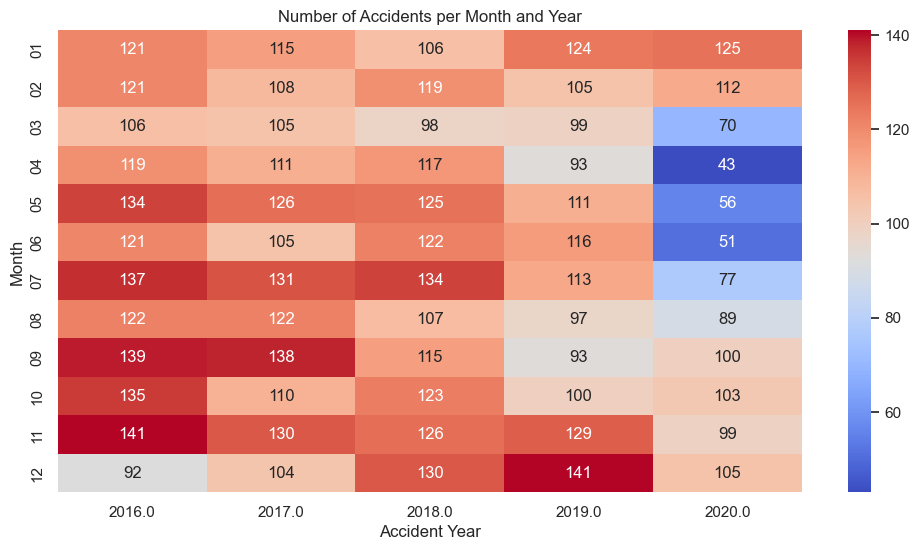

In [406]:
# Grouping the data by 'month' and the desired second variable (e.g., 'accident_year')
accidents_by_month_and_year = data.groupby(['month', 'accident_year'])['accident_index'].count().reset_index()

# Creating a pivot table for the heatmap
heatmap_data = accidents_by_month_and_year.pivot_table(index='month', columns='accident_year',
                                                       values='accident_index', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sb.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Accident Year')
plt.ylabel('Month')
plt.title('Number of Accidents per Month and Year')
plt.show()

Based on the heatmap, it can be observed that most accidents occur during the holiday periods such as November to January, and from July to September during the summer months. These periods coincide with increased travel and activity, which could contribute to the higher number of accidents.

### 4.6) Accidents By Hour
We will be investigating the amount of accidents per hour which have occurred across the years in Birmingham from 2016 till 2020

In [407]:
# Count the number of occurrences of each unique value in the `accident_year` column
accident_accident_month = X_train['time'].value_counts()

# Print the counts for each unique value
print(accident_accident_month)

16:00    71
15:30    61
15:00    58
17:00    57
19:00    56
         ..
01:01     1
19:48     1
00:44     1
13:17     1
12:34     1
Name: time, Length: 1218, dtype: int64


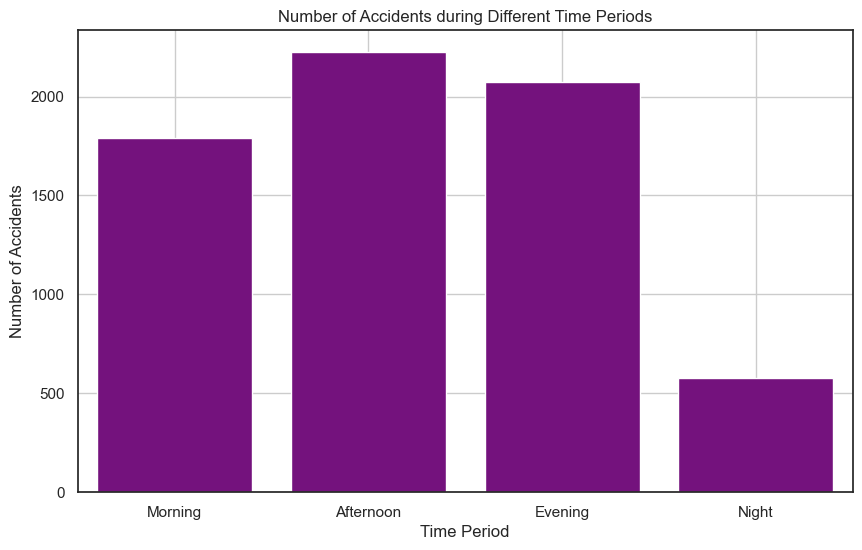

In [408]:
data = X_train

# Extracting the hour from the 'time' column as an integer
data['hour'] = data['time'].apply(lambda x: int(x.split(':')[0]))


# Categorizing the 'hour' column into different time periods
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


data['time_period'] = data['hour'].apply(categorize_hour)

# Univariate visualization
accidents_by_time_period = data.groupby('time_period')['accident_index'].count().reindex([
    'Morning', 'Afternoon', 'Evening', 'Night']).reset_index()

plt.figure(figsize=(10, 6))
sb.barplot(x='time_period', y='accident_index', data=accidents_by_time_period, color="#83008F")
plt.xlabel('Time Period')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents during Different Time Periods')
plt.grid(True)
plt.show()

Based on the bar plot provided, it can be observed that the majority of accidents occur during the afternoon and evening hours. This could suggest that factors such as rush hour traffic, reduced visibility due to sunset or darkness, and increased driver fatigue towards the end of the day may contribute to the higher frequency of accidents during these times. It is important to note that further analysis and investigation is required to validate these hypotheses and identify potential interventions to reduce the incidence of accidents during these periods.

#### Comparing number of accidents by the time and the day of the week

<Figure size 1200x600 with 0 Axes>

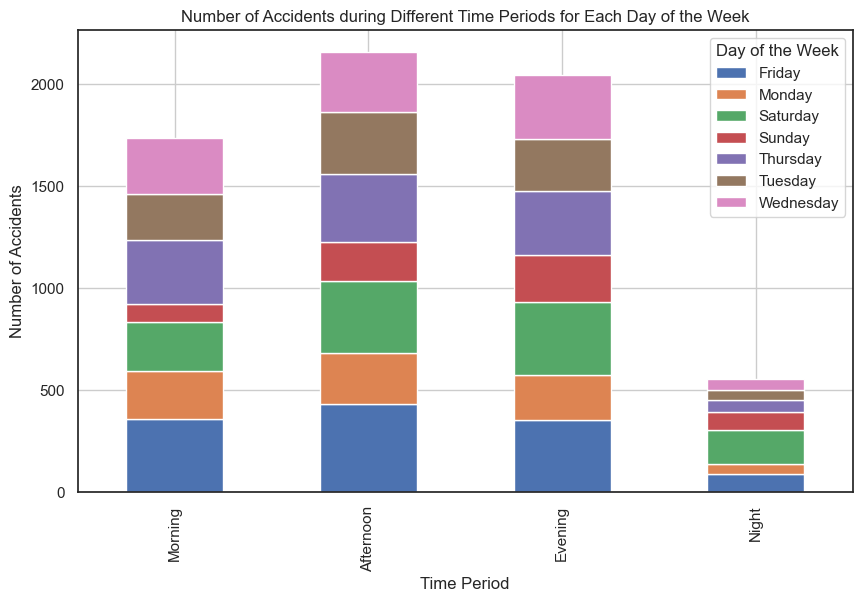

In [409]:
data = X_train

# Create a 'day_of_week' column from individual day columns
day_columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for i, day in enumerate(day_columns):
    data.loc[data[day] == 1, 'day_of_week'] = day

# Multivariate visualization
accidents_by_time_period_and_day = data.groupby(['time_period', 'day_of_week'])['accident_index'].count().reset_index()

pivot_data = accidents_by_time_period_and_day.pivot_table(index='time_period', columns='day_of_week',
                                                          values='accident_index', fill_value=0)
pivot_data = pivot_data.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Time Period')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents during Different Time Periods for Each Day of the Week')
plt.grid(True)
plt.legend(title='Day of the Week')
plt.show()

it appears that the majority of accidents occurred on Fridays and Saturdays, with a higher frequency of accidents during the afternoon and evening hours. This could suggest a potential association with increased traffic volume and driver behavior during these times, such as increased alcohol consumption or fatigue after a long work week. Further investigation and analysis is necessary to confirm these hypotheses and identify potential interventions to reduce the incidence of accidents during these periods.

### 4.7) Accident Severity Deep Dive

In [410]:
#Getting the value counts of the speed_limit variable
values = pd.DataFrame(X_train.loc[:, 'accident_severity'].value_counts())
values.columns = ['Accident Severity']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(X_train.loc[:, 'accident_severity'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Accident Severity %']
values.join(percentages)

Accident Severity Accident Severity %
3               5457              81.86%
2               1154              17.31%
1                 55               0.83%

**Values Description**
- 1 = Fatal
- 2 = Serious
- 3 = Slight

This shows that a very large chunk of accidents **(81%)** which happen in Birmingham only results in slight injuries and less than **1%** result in death.

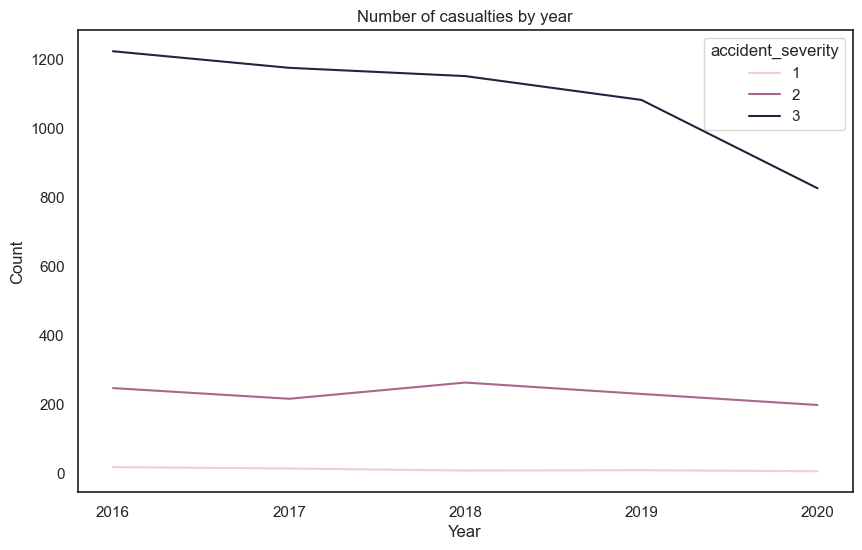

In [411]:
# Group the data by year and count the number of occurrences of each 
# unique value in the `number_of_casualties` column for each year
accident_severity_counts_by_year = X_train.groupby('accident_year')['accident_severity'].value_counts().reset_index(
    name='count')

# Plot the count of each unique value in the `number_of_casualties` column by year
sb.lineplot(x='accident_year', y='count', hue='accident_severity', data=accident_severity_counts_by_year)

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

# Set the x-axis tick values to be the same as the index values
plt.xticks(grouped_data.index)

# Set the plot title and axis labels
plt.title('Number of casualties by year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

Based on the line graph provided, it appears that the severity of accidents, as measured by the number of fatalities, has decreased over time.

### 4.8) Speed Limit

In [412]:
#Getting the value counts of the speed_limit variable
values = pd.DataFrame(X_train.loc[:, 'speed_limit'].value_counts())
values.columns = ['Speed Limit']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(X_train.loc[:, 'speed_limit'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Speed Limit %']
values.join(percentages)

Speed Limit Speed Limit %
30         5967        89.51%
40          367         5.51%
20          216         3.24%
70           71         1.07%
60           27         0.41%
50           18         0.27%

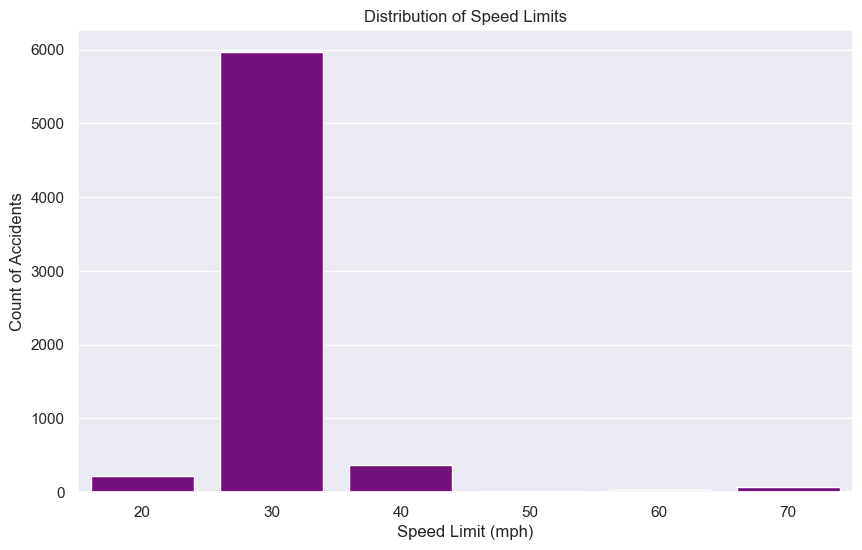

In [413]:
# Create a histogram of the speed_limit variable using seaborn's hist plot function
sb.countplot(data=X_train, x='speed_limit', color="#83008F")

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

# Set the plot title and axis labels
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Count of Accidents')

# Show the plot
plt.show()

We can observe that most accidents occur at areas where the speed limit is 30mph and although 70mph speed limit areas should have caused more accidents, only 1.45% of accidents that happened between 2016 - 2020 occurred in those areas.

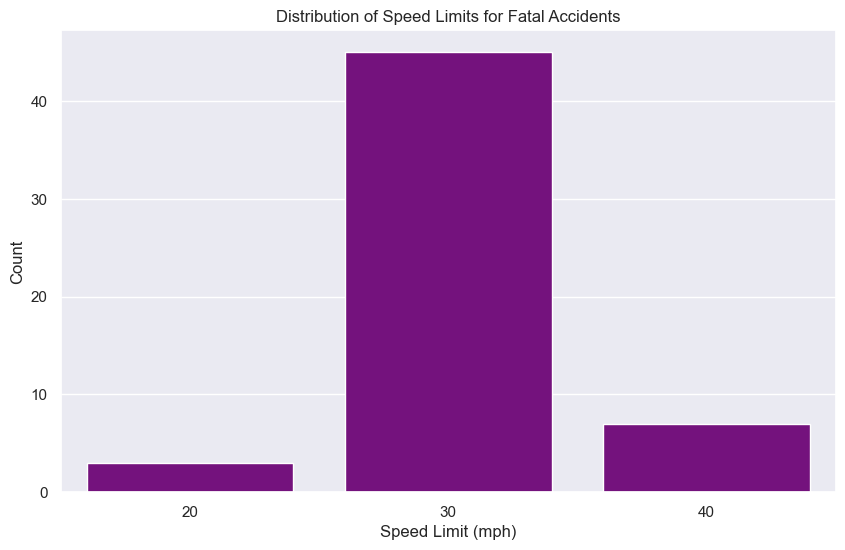

In [414]:
# Subset the data to only include accidents with severity 1
df_severity_1 = X_train[X_train['accident_severity'] == 1]

# Create a count plot to show the distribution of speed limits for severity 3 accidents
sb.countplot(x='speed_limit', data=df_severity_1, color='#83008F')

# Set the plot title and axis labels
plt.title('Distribution of Speed Limits for Fatal Accidents')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Count')

# Show the plot
plt.show()

This chart also shows that most fatal accidents occurred in areas where the speed limit was 30 mph

### 4.9) LSOA Location

LSOAs are small geographic areas used in the United Kingdom for the purpose of reporting and analyzing statistics at a granular level. They were introduced by the Office for National Statistics (ONS) as part of the Neighbourhood Statistics program.

In [415]:
# Count the number of occurrences of each unique value in the `number_of_casualties` column
accident_speed_limit = X_train['lsoa_of_accident_location'].value_counts()

# Print the counts for each unique value
print(accident_speed_limit)

E01009200    38
E01033617    37
E01009102    37
E01033615    37
E01008914    36
             ..
E01033058     1
E01010019     1
E01010153     1
E01009418     1
E01009825     1
Name: lsoa_of_accident_location, Length: 655, dtype: int64


In [416]:
#Getting the value counts of the lsoa_of_accident_location variable
values = pd.DataFrame(X_train.loc[:, 'lsoa_of_accident_location'].value_counts()[0:10])
values.columns = ['Accident Count in Location']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(X_train.loc[:, 'lsoa_of_accident_location'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Accident Percentage %']
values.join(percentages)

Accident Count in Location Accident Percentage %
E01009200                          38                 0.57%
E01033617                          37                 0.56%
E01009102                          37                 0.56%
E01033615                          37                 0.56%
E01008914                          36                 0.54%
E01009007                          36                 0.54%
E01033620                          35                 0.53%
E01033628                          35                 0.53%
E01009364                          34                 0.51%
E01009239                          34                 0.51%

It is observed that **E01009200** is the location in which the most accident has occurred.

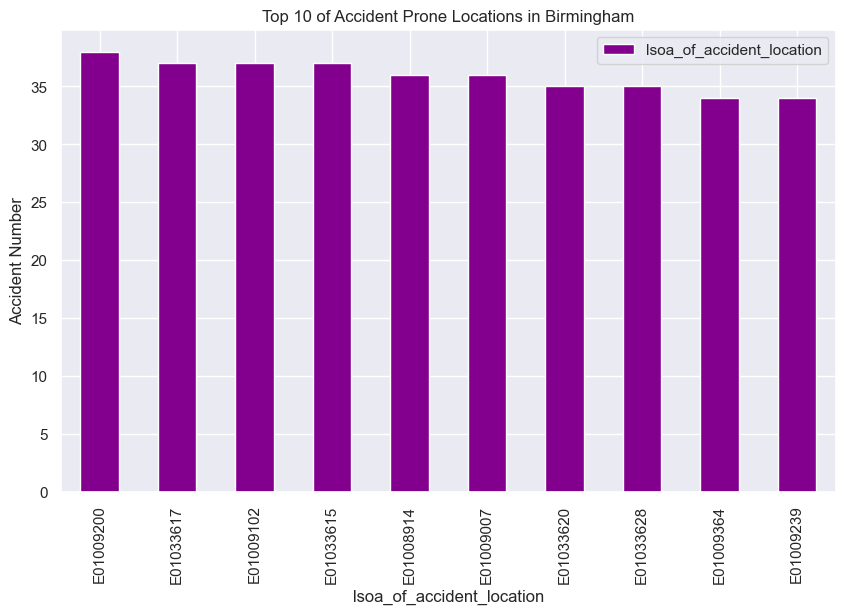

In [417]:
# Bar chart of the highest accidents per location
pd.DataFrame(X_train.loc[:, 'lsoa_of_accident_location'].value_counts()[0:10]).plot(kind='bar', color='#83008F')

# set plot title and labels
plt.title('Top 10 of Accident Prone Locations in Birmingham')
plt.xlabel('lsoa_of_accident_location')
plt.ylabel('Accident Number')
plt.show()

The value counts and the bar chart illustrate the top 10 most accident-prone areas.

### 4.10) Weather Conditions

**Weather Conditions Numbers Explained**

- 1 = Fine no high winds
- 2 = Raining no high winds
- 3 = Snowing no high winds
- 4 = Fine + high winds
- 5 = Raining + high winds
- 6 = Snowing + high winds
- 7 = Fog or mist
- 8 = Other
- 9 = Unknown

In [418]:
#Getting the value counts of the weather_conditions variable
values = pd.DataFrame(X_train.loc[:, 'weather_conditions'].value_counts()[0:10])
values.columns = ['Weather Conditions in that Location']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(X_train.loc[:, 'weather_conditions'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Weather conditions %']
values.join(percentages)

Weather Conditions in that Location Weather conditions %
1                                 5460               81.91%
2                                  600                 9.0%
9                                  294                4.41%
8                                  168                2.52%
5                                   56                0.84%
4                                   46                0.69%
3                                   24                0.36%
7                                   10                0.15%
6                                    8                0.12%

More than 81% of accidents occurred in 'Fine no high winds' conditions

**Investigating the impact of weather conditions to accident severity**

In [419]:
# Create the cross tabulation table
cross_tab = pd.crosstab(index=X_train['weather_conditions'], columns=X_train['accident_severity'])

# Print the table
print(cross_tab)

accident_severity    1    2     3
weather_conditions               
1                   48  953  4459
2                    3  105   492
3                    0    6    18
4                    1   10    35
5                    0   12    44
6                    0    1     7
7                    0    2     8
8                    1   27   140
9                    2   38   254


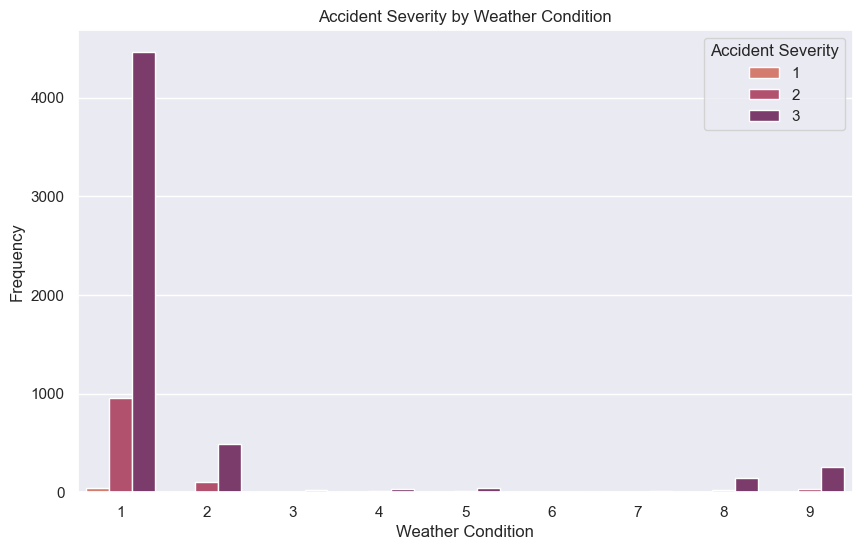

In [420]:
# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

sb.countplot(x='weather_conditions', hue='accident_severity', data=X_train, palette='flare')

# Set the plot title and axis labels
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()

The incidence of fatal accidents is more likely to occur during Fine weather conditions with no high winds, as a majority of accidents tend to happen in such weather conditions.

### 2.9) Descriptive Statistics on Road Surface Conditions

**Road Surface Numbers Explained**

- 1 = Dry
- 2 = Wet or damp
- 3 = Snow
- 4 = Frost or Ice
- 5 = Flood over 3cm deep
- -1 = Data missing or out of range

In [421]:
# Count the number of occurrences of each unique value in the `road_surface_conditions` column
accident_road_surface_conditions = X_train['road_surface_conditions'].value_counts()

# Print the counts for each unique value
print(accident_road_surface_conditions)

 1    5195
 2    1348
-1      61
 4      38
 3      21
 5       3
Name: road_surface_conditions, dtype: int64


Most accidents occur in dry road surfaces, and the number of accidents reduce as the road surface worsens

In [422]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=X_train['road_surface_conditions'], columns=X_train['accident_severity'])

# Print the table
print(cross_tab)

accident_severity         1    2     3
road_surface_conditions               
-1                        1    8    52
 1                       48  889  4258
 2                        6  248  1094
 3                        0    2    19
 4                        0    7    31
 5                        0    0     3


In [423]:
# Create a cross tabulation of road_surface_conditions and accident_severity
cross_tab = pd.crosstab(X_train['road_surface_conditions'], X_train['accident_severity'])

cross_tab

accident_severity         1    2     3
road_surface_conditions               
-1                        1    8    52
 1                       48  889  4258
 2                        6  248  1094
 3                        0    2    19
 4                        0    7    31
 5                        0    0     3

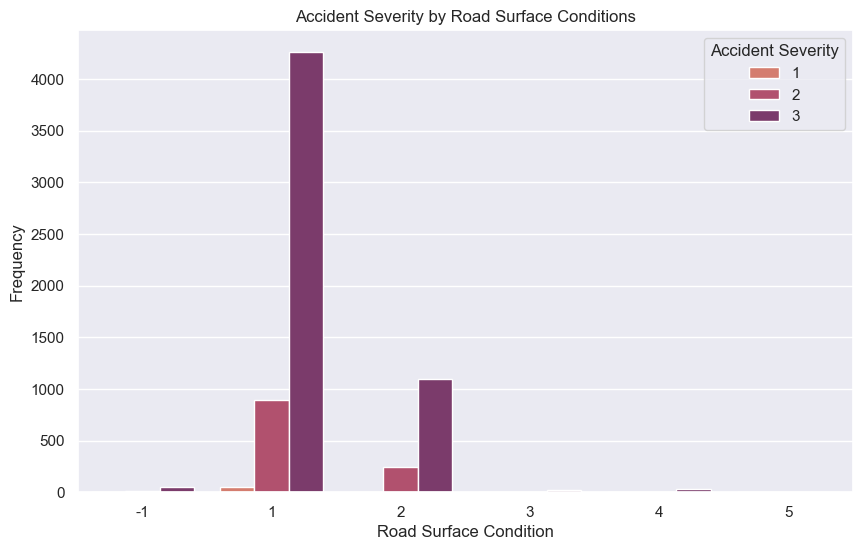

In [424]:
# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

sb.countplot(x='road_surface_conditions', hue='accident_severity', data=X_train, palette='flare')

# Set the plot title and axis labels
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()

Due to most accidents happening on dry road surface conditions, more fatal accidents are prone to also happen on that road surface condition

### 2.10) Descriptive Statistics on Lighting Conditions

**Lighting Condition Numbers Explained**

- 1 = Daylight
- 4 = Darkness - lights lit
- 5 = Darkness - lights unlit
- 6 = Darkness - no lighting
- 7 = Darkness - lighting unknown

In [425]:
# Count the number of occurrences of each unique value in the `light_conditions` column
accident_light_conditions = df_accident['light_conditions'].value_counts()

# Print the counts for each unique value
print(accident_light_conditions)

1    8506
4    3728
7     188
5      82
6      45
Name: light_conditions, dtype: int64


Most accidents occur during the day

**Looking deeper into the amount of accidents on different road conditions with light conditions**

In [426]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=X_train['road_surface_conditions'], columns=X_train['light_conditions'])

# Print the table
cross_tab

light_conditions            1     4   5   6   7
road_surface_conditions                        
-1                         36    22   0   0   3
 1                       4005  1105  19  12  54
 2                        734   586   7  10  11
 3                          7    13   0   0   1
 4                         23    14   0   1   0
 5                          3     0   0   0   0

We can observe that most accidents also occur the most on dry road surface and during daylight

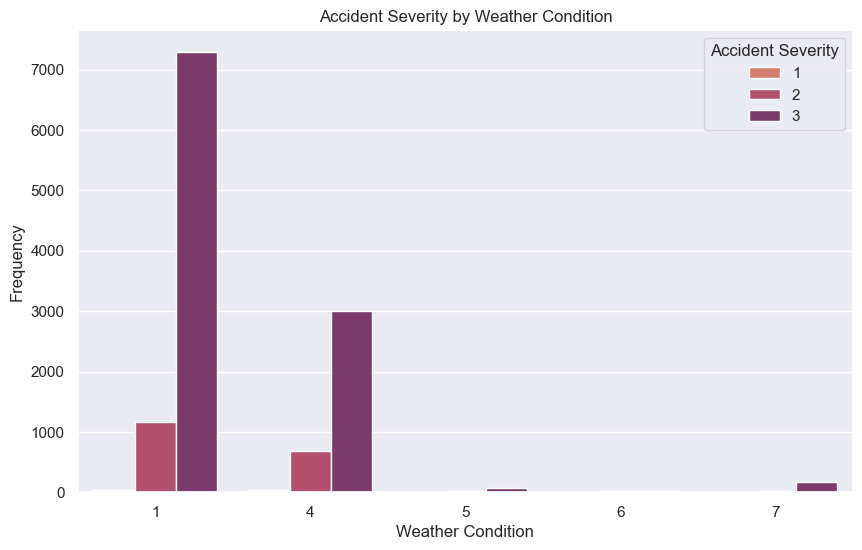

In [427]:
# Create a cross tabulation of weather_condition and accident_severity
cross_tab = pd.crosstab(X_train['light_conditions'], X_train['accident_severity'])

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

sb.countplot(x='light_conditions', hue='accident_severity', data=df_accident, palette='flare')

# Set the plot title and axis labels
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')

plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()

Due to most accidents happening in daylight, more fatal accidents are prone to also happen in that lighting condition

From the matrix we can observe that speed limit and trunk_road_flag have a strong positive correlation. THe other variables seem to have either a very low positive relationship or a very low negative relationship.

## 5.0 Statistical Test

We aim to determine if there is a statistically significant difference in the number of accidents between weekdays (Monday to Thursday) and weekends (Friday and Saturday). To achieve this, we used the chi-square test for independence, which is a statistical test that helps to identify if there is a significant association between two categorical variables.

In [428]:
# Creating a new column 'is_weekend' with 1 if the day is Friday or Saturday, and 0 if it's a weekday (Monday to Thursday)
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x in ['Friday', 'Saturday'] else 0)

# Create a contingency table for weekdays and weekends
contingency_table = pd.crosstab(data['is_weekend'], data['accident_index'])

# Perform the chi-square test for independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square value:", chi2)
print("P-value:", p_value)

Chi-square value: 6665.999999999999
P-value: 0.49424142920688885


Since the obtained p-value (0.5) is greater than the predetermined significance level (e.g., 0.05), we fail to reject the null hypothesis. This means that based on the available data, there is no statistically significant evidence to suggest that the number of accidents is different between weekdays and weekends.

## 2) Data preprocessing (Data cleaning, Handling missing values)

**The first done is to identify the columns which would not be useful to help implement the solution to the business problem. The columns which where identified to be useful and would also act as our independent variables are:**
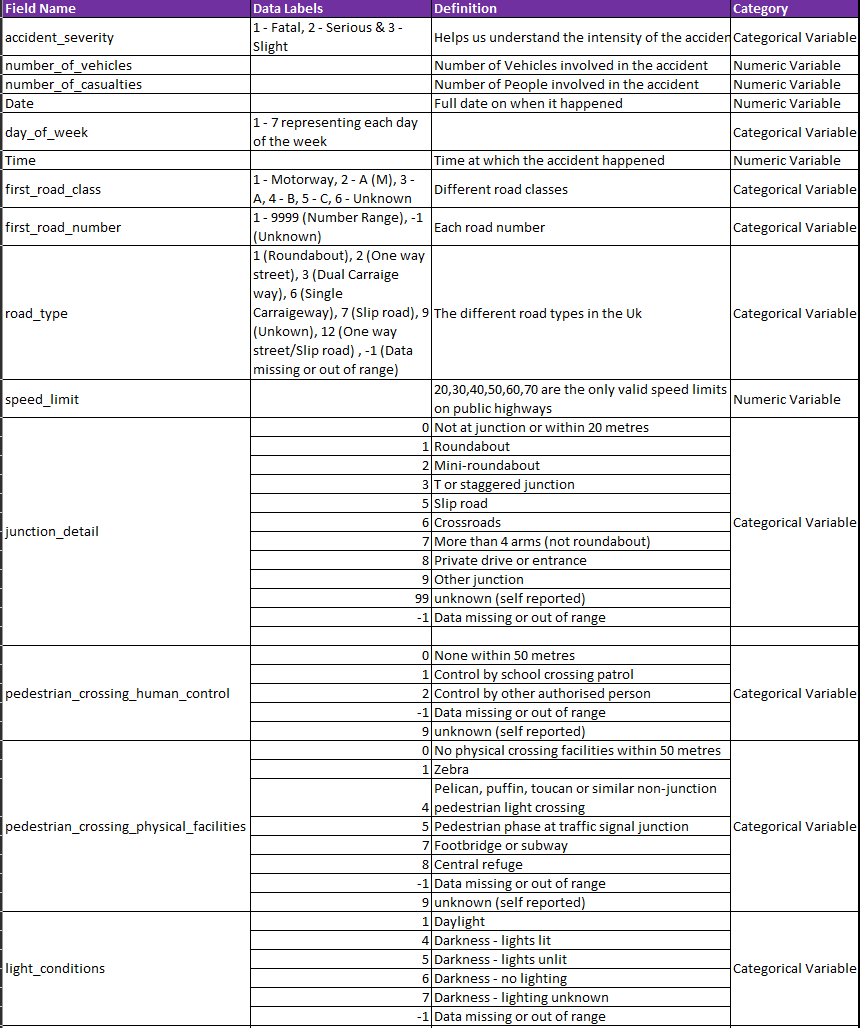
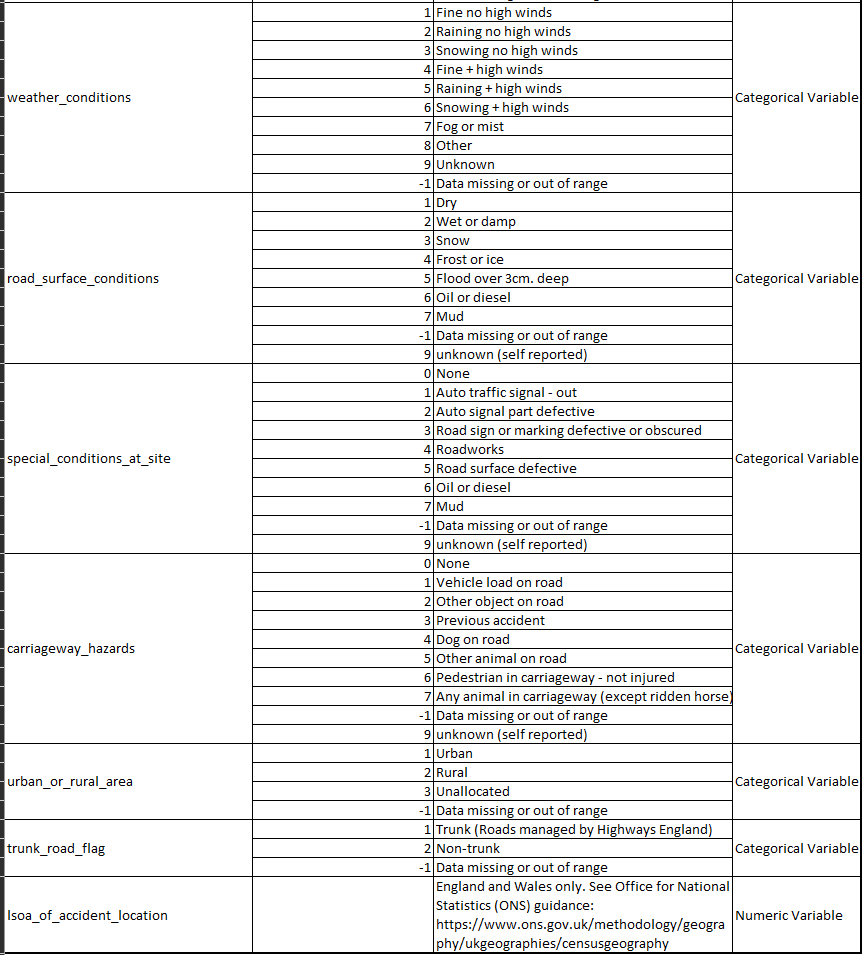

**Deleting columns identified to not be useful to our business problem**

In [429]:
# Deleting Unused Columns
X_train.drop(["accident_index", "accident_reference", "time", "accident_year", "police_force",
              "did_police_officer_attend_scene_of_accident", "location_easting_osgr", "location_northing_osgr",
              "local_authority_district", "local_authority_highway", "local_authority_ons_district", "longitude",
              "junction_control", "second_road_class", "second_road_number",
              "latitude", "hour", "time_period", "day_of_week", "is_weekend"], axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6666 entries, 724 to 235
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   accident_severity                        6666 non-null   object
 1   number_of_vehicles                       6666 non-null   int32 
 2   number_of_casualties                     6666 non-null   int32 
 3   first_road_class                         6666 non-null   object
 4   first_road_number                        6666 non-null   object
 5   road_type                                6666 non-null   object
 6   speed_limit                              6666 non-null   int32 
 7   junction_detail                          6666 non-null   object
 8   pedestrian_crossing_human_control        6666 non-null   object
 9   pedestrian_crossing_physical_facilities  6666 non-null   object
 10  light_conditions                         6666 non-null   ob

In [430]:
# Deleting Unused Columns
X_test.drop(["accident_index", "accident_reference", "time", "accident_year", "police_force",
             "did_police_officer_attend_scene_of_accident", "location_easting_osgr", "location_northing_osgr",
             "local_authority_district", "local_authority_highway", "local_authority_ons_district", "longitude",
             "junction_control", "second_road_class", "second_road_number",
             "latitude"], axis=1, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 4465 to 8030
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   accident_severity                        2858 non-null   object
 1   number_of_vehicles                       2858 non-null   int32 
 2   number_of_casualties                     2858 non-null   int32 
 3   first_road_class                         2858 non-null   object
 4   first_road_number                        2858 non-null   object
 5   road_type                                2858 non-null   object
 6   speed_limit                              2858 non-null   int32 
 7   junction_detail                          2858 non-null   object
 8   pedestrian_crossing_human_control        2858 non-null   object
 9   pedestrian_crossing_physical_facilities  2858 non-null   object
 10  light_conditions                         2858 non-null   

In [431]:
# Validating the number of rows and columns
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12549 entries, 8059418 to 8555586
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               12549 non-null  object 
 1   accident_year                                12549 non-null  int64  
 2   accident_reference                           12549 non-null  object 
 3   location_easting_osgr                        12549 non-null  float64
 4   location_northing_osgr                       12549 non-null  float64
 5   longitude                                    12549 non-null  float64
 6   latitude                                     12549 non-null  float64
 7   police_force                                 12549 non-null  int64  
 8   accident_severity                            12549 non-null  int64  
 9   number_of_vehicles                           12549 non-null  int

### Null Values

In [432]:
#Checking the records with missing values in train data
print(X_test.isnull().sum())

accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surface_conditions                    0
special_conditions_at_site                 0
carriageway_hazards                        0
urban_or_rural_area                        0
trunk_road_flag                            0
lsoa_of_accident_location                  0
month                                      0
Sunday                                     0
Monday                                     0
Tuesday                                    0
Wednesday 

**In the data set, for certain cases in which the data is not known, they are represented as -1 so we are replacing those vales as null to know the amount of null values in each column**

In [433]:
# Find Missing Values
X_train = X_train.replace(-1, None)
X_train.isna().sum()

accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
pedestrian_crossing_human_control          30
pedestrian_crossing_physical_facilities    30
light_conditions                            0
weather_conditions                          0
road_surface_conditions                    61
special_conditions_at_site                  4
carriageway_hazards                         6
urban_or_rural_area                         0
trunk_road_flag                             0
lsoa_of_accident_location                   0
month                                       0
Sunday                                      0
Monday                                      0
Tuesday                           

In [434]:
# Find Missing Values
X_test = X_test.replace(-1, None)
X_test.isna().sum()

accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
pedestrian_crossing_human_control          10
pedestrian_crossing_physical_facilities     9
light_conditions                            0
weather_conditions                          0
road_surface_conditions                    27
special_conditions_at_site                  4
carriageway_hazards                         4
urban_or_rural_area                         0
trunk_road_flag                             0
lsoa_of_accident_location                   0
month                                       0
Sunday                                      0
Monday                                      0
Tuesday                           

**Since the amount of rows with null values are less than 1% we will drop those columns**

In [435]:
# Ensuring indices are the same before removing rows
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [436]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6666, 26)
(6666,)
(2858, 26)
(2858,)


In [437]:
# Delete Rows with Missing Values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

**Checking for duplicate rows**

In [438]:
X_train.duplicated()
X_test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2853    False
2854    False
2855    False
2856    False
2857    False
Length: 2821, dtype: bool

In [439]:
# remove the duplicates
X_train.drop_duplicates(inplace=True)
X_test.drop_duplicates(inplace=True)

In [440]:
#Handling Outliers
X_train = X_train[X_train["number_of_vehicles"] <= 15]
X_test = X_test[X_test["number_of_vehicles"] <= 15]

X_train = X_train[X_train["number_of_casualties"] <= 12]
X_test = X_test[X_test["number_of_casualties"] <= 12]

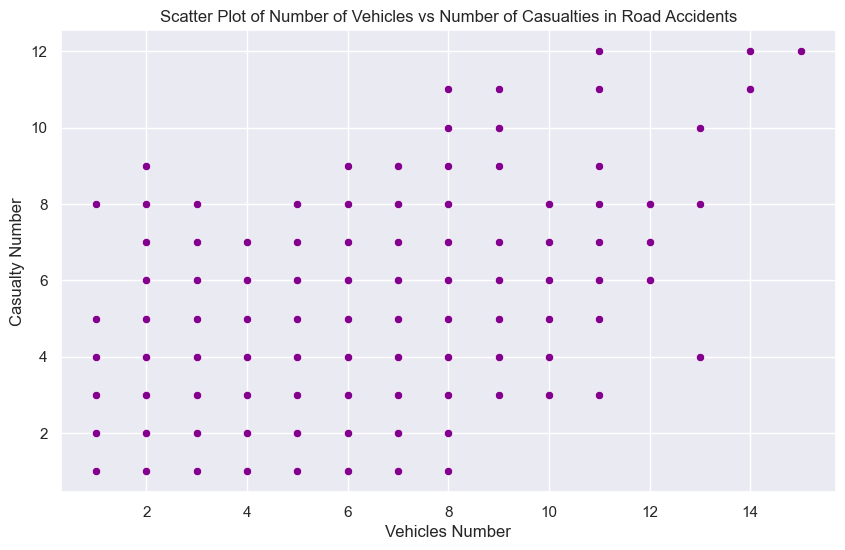

In [441]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Create a scatter plot of number_of_vehicles vs number_of_casualties
sb.scatterplot(x="number_of_vehicles", y="number_of_casualties", data=X_train)

# Set the background color to white
sb.set_style('white')
# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})

# Set the plot title and axis labels
plt.title('Scatter Plot of Number of Vehicles vs Number of Casualties in Road Accidents')
plt.xlabel('Vehicles Number')
plt.ylabel('Casualty Number')

# Show the plot
plt.show()

In [442]:
# Label Encoding
# Creating an Instance of Label Encoder.
le = LabelEncoder()

# Using .fit_transform to Fit Labels for Location
label_location = le.fit_transform(X_train.lsoa_of_accident_location)
# Replacing Location Column with the Encoded Versions
X_train.drop(["lsoa_of_accident_location"], axis=1, inplace=True)
X_train["location"] = label_location
X_train.info()

label_location = le.fit_transform(X_test.lsoa_of_accident_location)
# Replacing Location Column with the Encoded Versions
X_test.drop(["lsoa_of_accident_location"], axis=1, inplace=True)
X_test["location"] = label_location
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6568 entries, 0 to 6665
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   accident_severity                        6568 non-null   object
 1   number_of_vehicles                       6568 non-null   int32 
 2   number_of_casualties                     6568 non-null   int32 
 3   first_road_class                         6568 non-null   object
 4   first_road_number                        6568 non-null   object
 5   road_type                                6568 non-null   object
 6   speed_limit                              6568 non-null   int32 
 7   junction_detail                          6568 non-null   object
 8   pedestrian_crossing_human_control        6568 non-null   object
 9   pedestrian_crossing_physical_facilities  6568 non-null   object
 10  light_conditions                         6568 non-null   obj

In [443]:
# Deleting corresponding rows in y_test & y_train
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

In [444]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6568, 26)
(6568,)
(2817, 26)
(2817,)


In [445]:
# Fit Transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")

colsTrain = list(X_train.columns)
X_train[colsTrain] = scaler.fit_transform(X_train[colsTrain])

colsTest = list(X_test.columns)
X_test[colsTest] = scaler.fit_transform(X_test[colsTest])

X_train.head()

accident_severity  number_of_vehicles  number_of_casualties  \
0          -1.972438           -0.305425              -0.58961   
1           0.459507           -0.305425              -0.58961   
2           0.459507           -0.305425              -0.58961   
3           0.459507           -0.952740              -0.58961   
4           0.459507           -0.305425              -0.58961   

   first_road_class  first_road_number  road_type  speed_limit  \
0          0.996447          -0.592529   0.647556    -0.146530   
1          0.996447          -0.592529  -2.211896    -0.146530   
2          0.996447          -0.592529   0.647556    -0.146530   
3         -0.379928           1.713900   0.647556     1.740545   
4         -1.068115           1.698800   0.647556     1.740545   

   junction_detail  pedestrian_crossing_human_control  \
0        -0.915602                          -0.082812   
1        -0.124641                          -0.082812   
2        -0.915602                          -0.082812   
3         0.270839                          -0.082812   
4        -0.915602                          -0.082812   

   pedestrian_crossing_physical_facilities  ...  trunk_road_flag     month  \
0                                -0.491362  ...         0.128689 -1.322557   
1                                -0.491362  ...         0.128689  0.969334   
2                                -0.491362  ...         0.128689 -0.749584   
3                                 1.985434  ...         0.128689  0.109875   
4                                -0.491362  ...         0.128689 -0.176611   

     Sunday    Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
0  2.177352 -0.436650 -0.449665  -0.462659 -0.463643 -0.499418 -0.447103   
1 -0.410568 -0.436650 -0.449665  -0.462659 -0.463643  1.830253 -0.447103   
2 -0.410568  2.074659 -0.449665  -0.462659 -0.463643 -0.499418 -0.447103   
3 -0.410568 -0.436650  1.947574  -0.462659 -0.463643 -0.499418 -0.447103   
4 -0.410568 -0.436650  1.947574  -0.462659 -0.463643 -0.499418 -0.447103   

   location  
0 -1.460411  
1 -0.282440  
2  1.082346  
3 -0.064489  
4  0.900721  

[5 rows x 26 columns]

## 5) Conclusion
In this group assignment we have been able to explore the initial dataset and also modified the data in such a manner to be able to predict the amount of accidents in a particular location. We created several descriptive statistics and exploratory data analysis for different variables to help understand the accidents which have occured from 2016 till 2020. We also created new columns for month and calculated the amount of accidents which happened in a particular month at a particular location for that particular year. By predicting the amount of accidents that could happen in a particular month the Birmingham city council would be able to prepare for this by repairing roads and making sure if those accidents even occur, casualties are attended to swiftly.

## 6) Data Exporting
After completion of the group asssignement the transformed dataset is exported for the individual assignment to be completed.

In [446]:
X_train.to_csv("dataset_5yrs_xTrain.csv", index=False)
X_test.to_csv("dataset_5yrs_xTest.csv", index=False)
y_train.to_csv("dataset_5yrs_yTrain.csv", index=False)
y_test.to_csv("dataset_5yrs_yTest.csv", index=False)